#                                           Reason of churning
1. Loading data 
2. Exploring dataframes
3. Missing Data
4. Data visualization
5. Data cleaning
6. Format data
7. Feature Engineering\
A. Work with categorical data\
8. Outliers\
A. Log trasformation\
B. Removing outliers
9. Modelling\
A. Model finetuning
10. Feature importance

## 1. Loading Data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("ml_case_training_data.csv")
df_hist=pd.read_csv("ml_case_training_hist_data.csv")
churn=pd.read_csv("ml_case_training_output.csv")

In [3]:
# Visualisation functions
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(kind="bar",
    stacked=True,
    figsize=size_,
    rot=rot_,
    title=title_)
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
    # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
        ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
        color=colour,
        size=textsize,
        )

In [4]:
def plot_dates(dataframe, column, fontsize_=12):
    """
    Plot monthly churn and retention distribution
    """
    # Group by month
    temp = dataframe[[column,
    "churn",
    "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    # Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    plt.show()

def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
        return month

## 2A. Exploring training dataset

In [5]:
df.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [7]:
df.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


1. The minimum consumption and forecasts for electricity and gas (yearly and monthly) are negative. This could mean that
the client companies are producing energy and therefore energy should be "returned", although it is unlikely and we will consider it
as corrupted data.
2. The campaign_disc_ele is an empty column. 
3. Highly skewed data when we look at the percentiles.

## 2B. Exploring training history data

In [8]:
df_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [9]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [10]:
df_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We might be a bit concerned about the negative values in the fix price column. One more time, this might be corruped data and we will change
them to positive when cleaning the data.

## 2C. Exploring churn dataset

In [11]:
churn.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


# 3. Missing Data

In [12]:
datasets = [df, df_hist,churn]
def null_columns(df):
    return( df.isnull().sum()/len(df.index)*100)

for dataset in datasets:
    print("The data set has", dataset.shape[0], "rows and", dataset.shape[1], "columns \n")
    print(null_columns(dataset).sort_values(ascending=False))

The data set has 16096 rows and 32 columns 

campaign_disc_ele           100.000000
forecast_cons                78.205765
date_first_activ             78.205765
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
activity_new                 59.300447
channel_sales                26.205268
date_modif_prod               0.975398
forecast_price_energy_p2      0.782803
forecast_price_energy_p1      0.782803
forecast_discount_energy      0.782803
forecast_price_pow_p1         0.782803
origin_up                     0.540507
date_renewal                  0.248509
net_margin                    0.093191
margin_gross_pow_ele          0.080765
margin_net_pow_ele            0.080765
pow_max                       0.018638
date_end                      0.012425
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_meter_rent_12m       0.000000
has_gas                       0.000000
date_activ         

There are some columns which have more than 50% of missing data

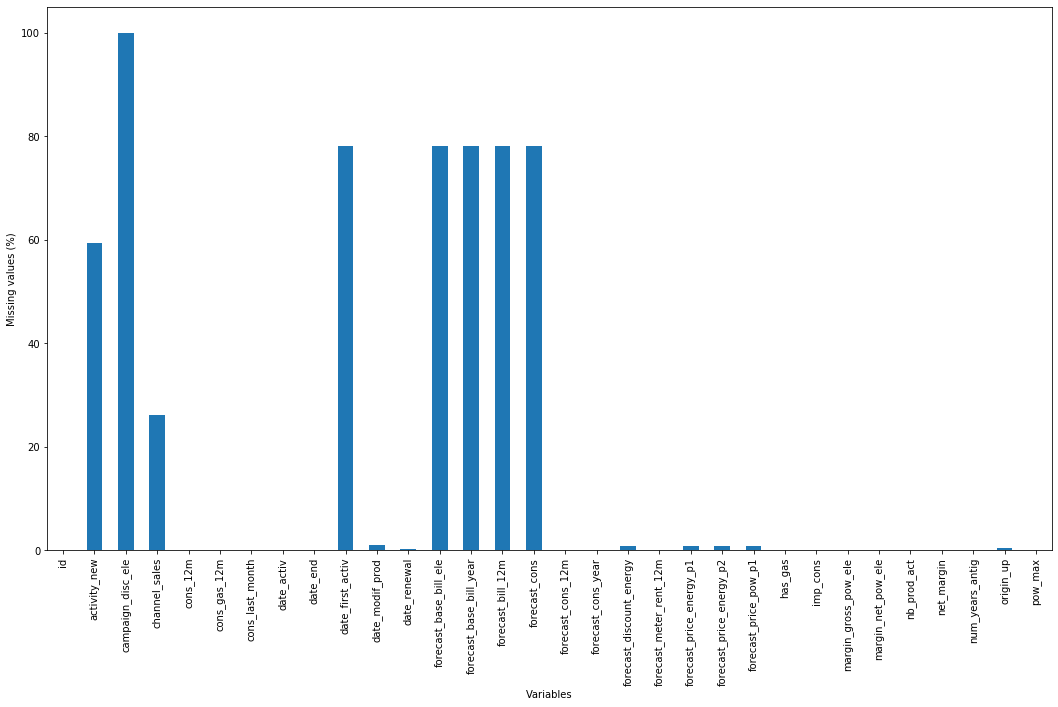

In [13]:
import matplotlib.pyplot as plt
# Plot missing data
null_columns(df).plot(kind="bar", figsize=(18,10))
# Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

## 4. Data visualization
### Churn

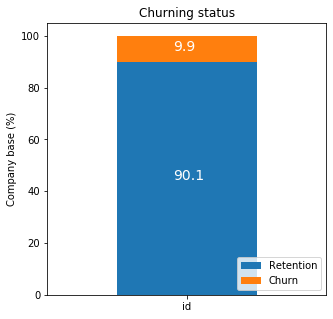

In [14]:
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")

In [15]:
# Connect 2 dataframes
train = pd.merge(df, churn, on="id")

### SME activity
Let's show the activity distribution of the companies as well as the sales channel.
Intuitively this might be an important predictive feature for energy consumption

In [16]:
activity= train[["id","activity_new", "churn"]]
activity = activity.groupby([activity["activity_new"],
 activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

In [17]:
activity

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0
kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0
kwuslieomapmswolewpobpplkaooaaew,200.0,30.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0
ckfxocssowaeipxueikxcmaxdmcduxsa,176.0,13.0
...,...,...
opoiuuwdmxdssidluooopfswlkkkcsxf,NaN,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,NaN,2.0
wceaopxmdpccxfmcdpopulcaubcxibuw,NaN,1.0


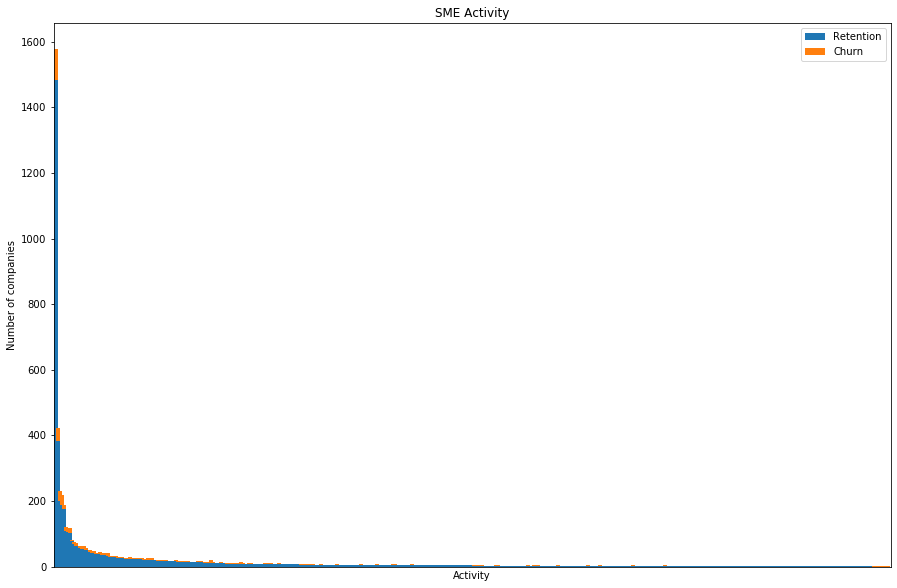

In [18]:
import matplotlib.pyplot as plt
activity.plot(kind="bar",
 figsize=(15, 10),
 width=2,
 stacked=True,
 title="SME Activity")
# Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])
plt.show()

We see churn is not specifically related to any SME cateogry in particular.

In [19]:
activity_total = activity.fillna(0)[0]+activity.fillna(0)[1]
activity_percentage = activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({"Percentage churn": activity_percentage,
 "Total companies": activity_total }).sort_values(by="Percentage churn",
 ascending=False).head(10)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


### How will the SME activity influence our predictive model?
Our predictive model is likely to struggle accurately predicting the SME activity due to the large number of categories and low number of companies belonging to each category.

### Sales channel

The sales channel seems to be an important feature when predecting the churning of a user. It is not the same if the sales were through email or telephone.

In [20]:
channel = train[["id","channel_sales", "churn"]]
channel = channel.groupby([channel["channel_sales"],
 channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,4.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0


In [21]:
# Percentage
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.501694,12.498306
usilxuppasemubllopkaafesmlibmsdf,89.612188,10.387812
ewpakwlliwisiwduibdlfmalxowmwpci,91.511387,8.488613
lmkebamcaaclubfxadlmueccxoimlema,94.404245,5.595755
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


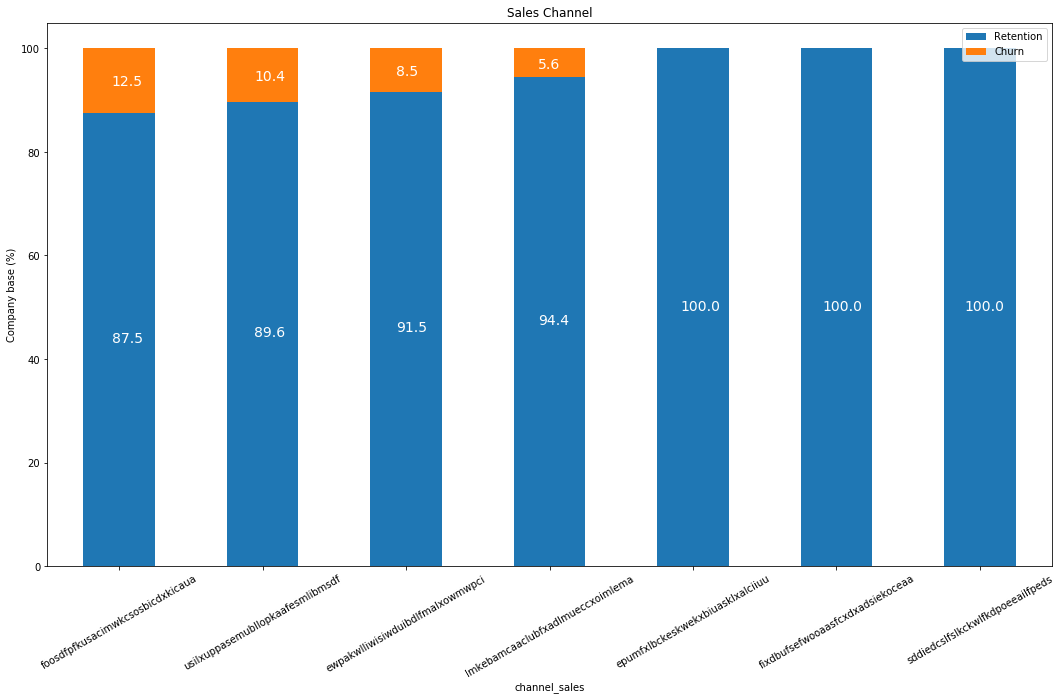

In [22]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

In [23]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage = channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage": channel_percentage,
 "Total companies": channel_total }).sort_values(by="Churn percentage",
 ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


# Consumption
Let's see the distribution of the consumption over the last year and last month

In [24]:
consumption = train[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]
consumption

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,831.80,f,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,32270,47940,0,0.00,t,0
16092,d0a6f71671571ed83b2645d23af6de00,7223,0,181,15.94,f,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,18.05,f,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,0.00,f,0


In [25]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

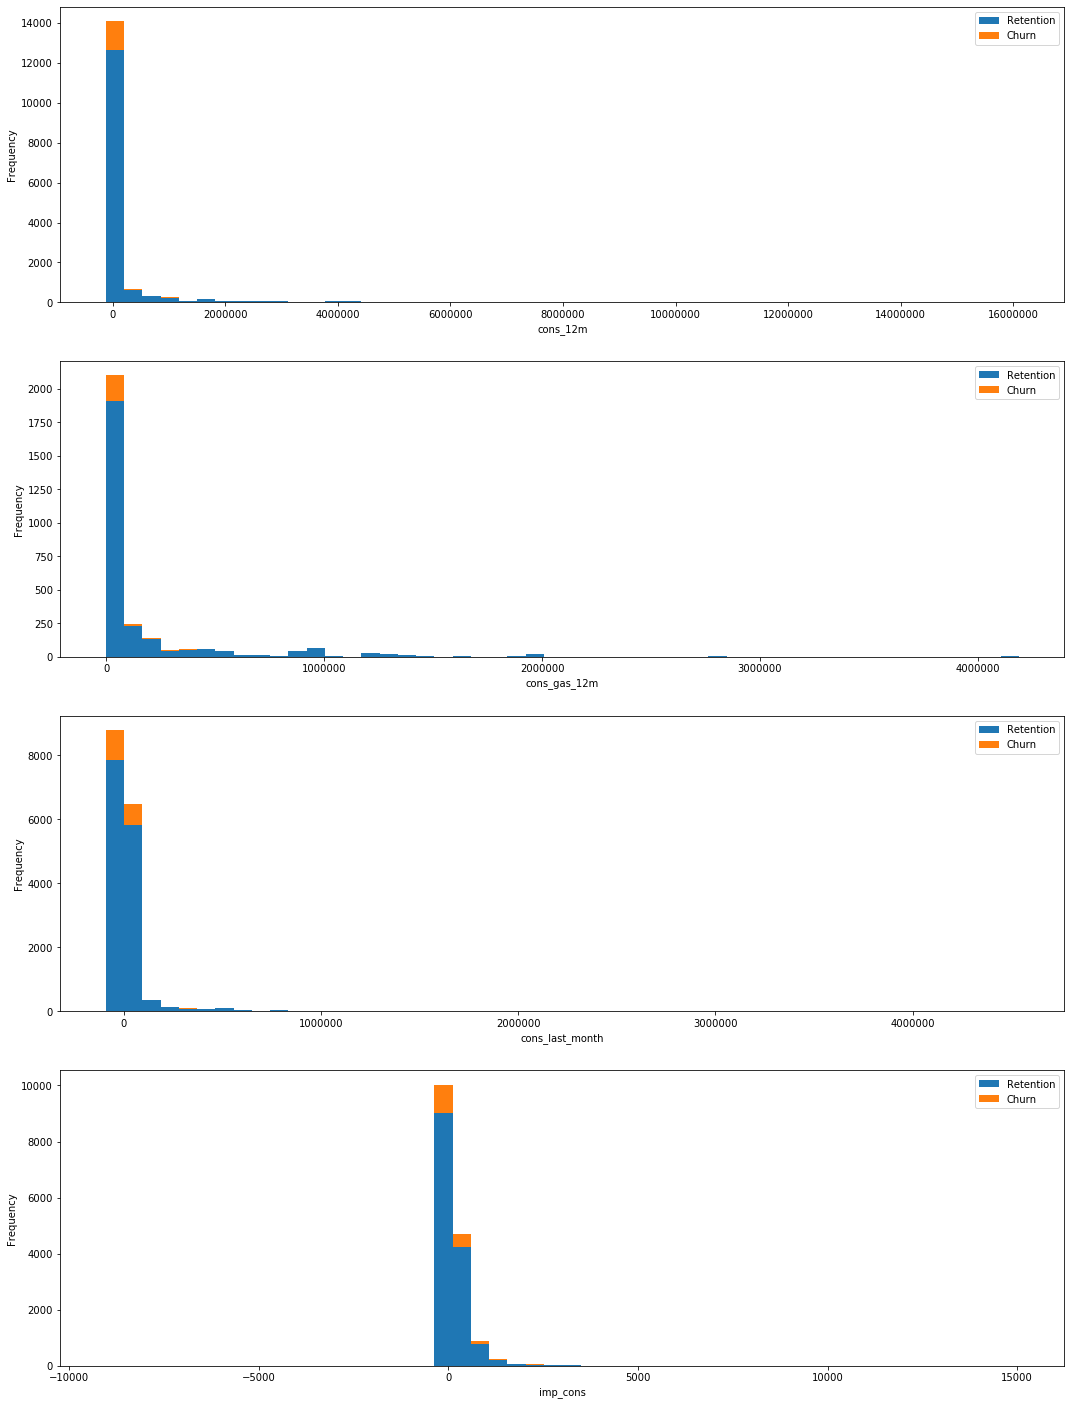

In [26]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] == "t"], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

We can see here that the consumption data is highly skewed to the right, presenting a very long right-tail towards the higher values of the distribution.

The values on the higher end and lower ends of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. 

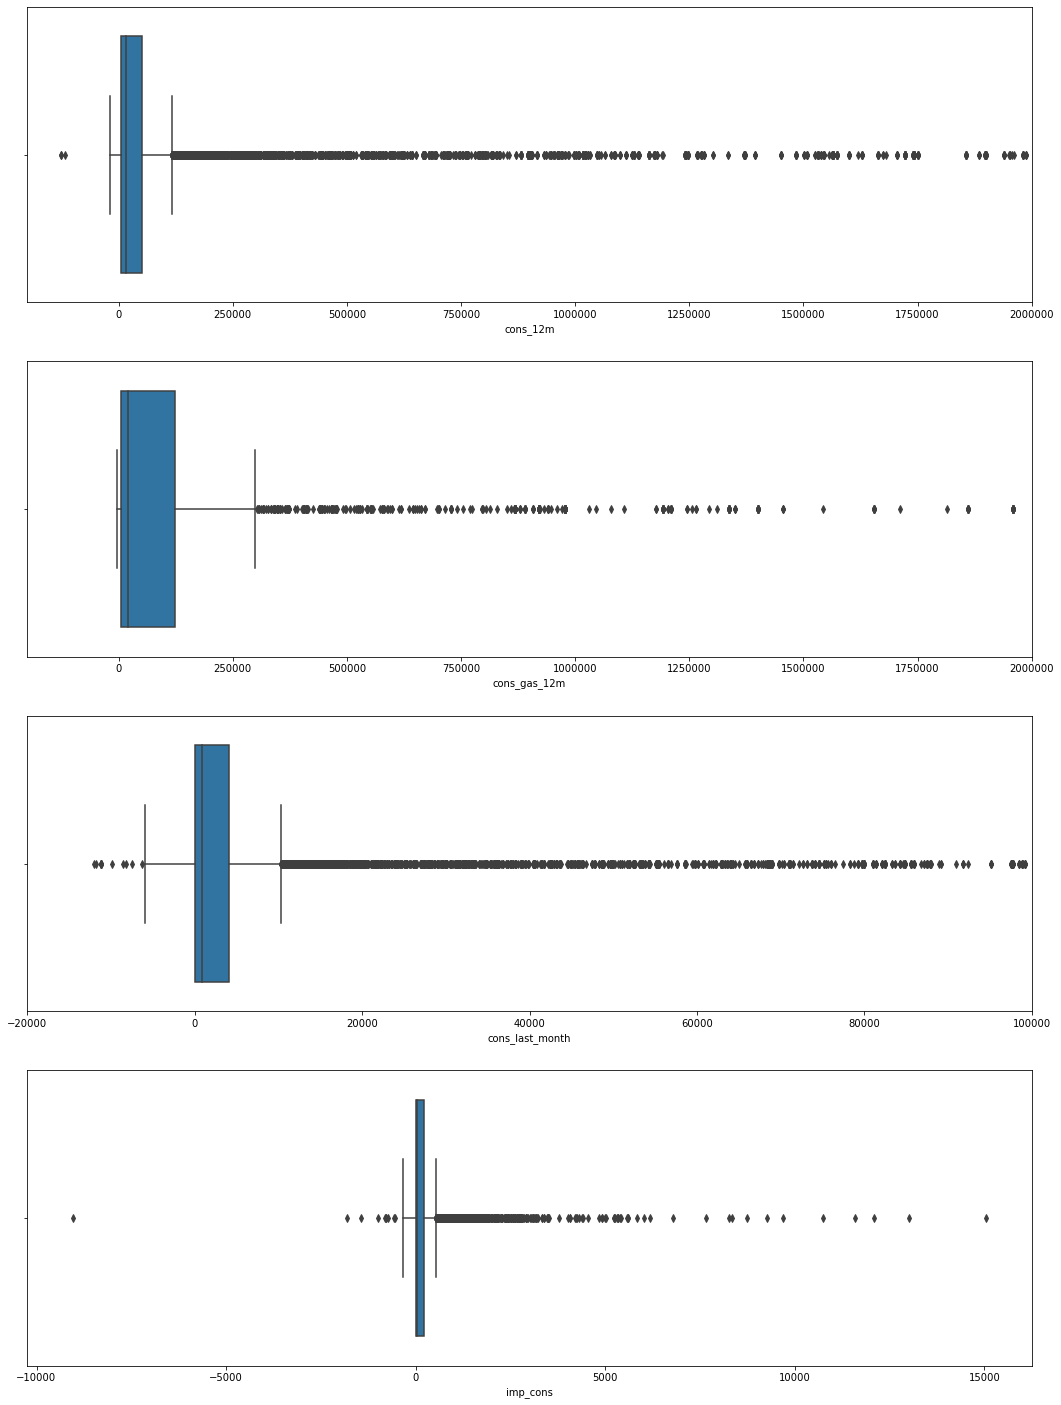

In [27]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
 ax.ticklabel_format(style='plain', axis='x')
# Set x-axis limit
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)
plt.show()

It is very clear now that we have a highly skewed distribution, and several outliers.

# Data

In [28]:
dates = train[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()
# Transform date columns to datetime type
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d')
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')

dates

,id,date_activ,date_end,date_modif_prod,date_renewal,churn
0,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
1,24011ae4ebbe3035111d65fa7c15bc57,2013-06-15,2016-06-15,NaT,2015-06-23,1
2,d29c2c54acc38ff3c0614d0a653813dd,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0
3,764c75f661154dac3a6c254cd082ea7d,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0
4,bba03439a292a1e166f80264c16191cb,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0
...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,2012-05-24,2016-05-08,2015-05-08,2014-05-26,0
16092,d0a6f71671571ed83b2645d23af6de00,2012-08-27,2016-08-27,2012-08-27,2015-08-28,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,2012-02-08,2016-02-07,2012-02-08,2015-02-09,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,2012-08-30,2016-08-30,2012-08-30,2015-08-31,0


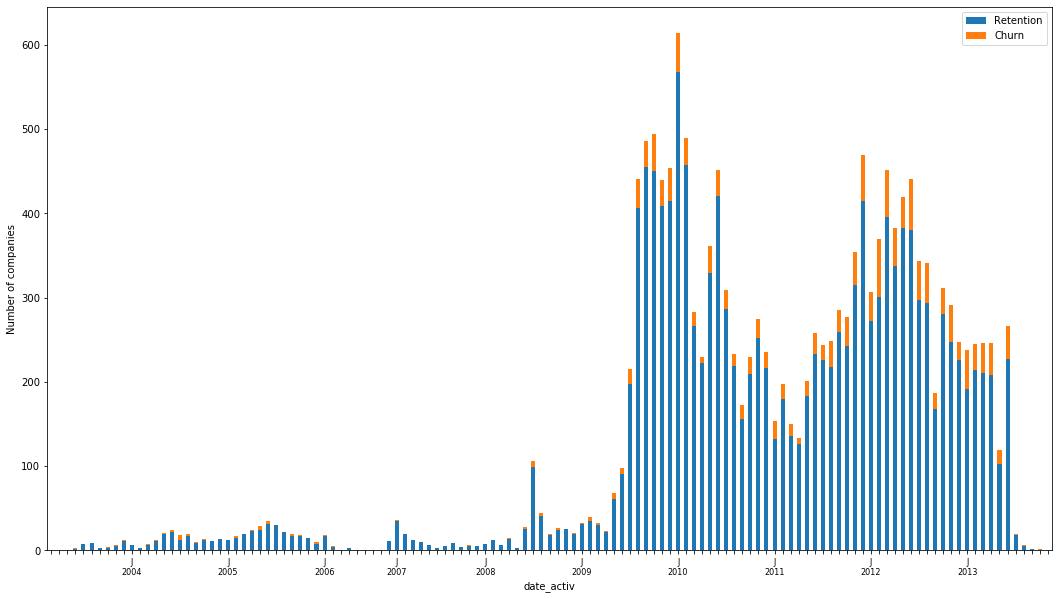

In [29]:
plot_dates(dates, "date_activ", fontsize_=8)

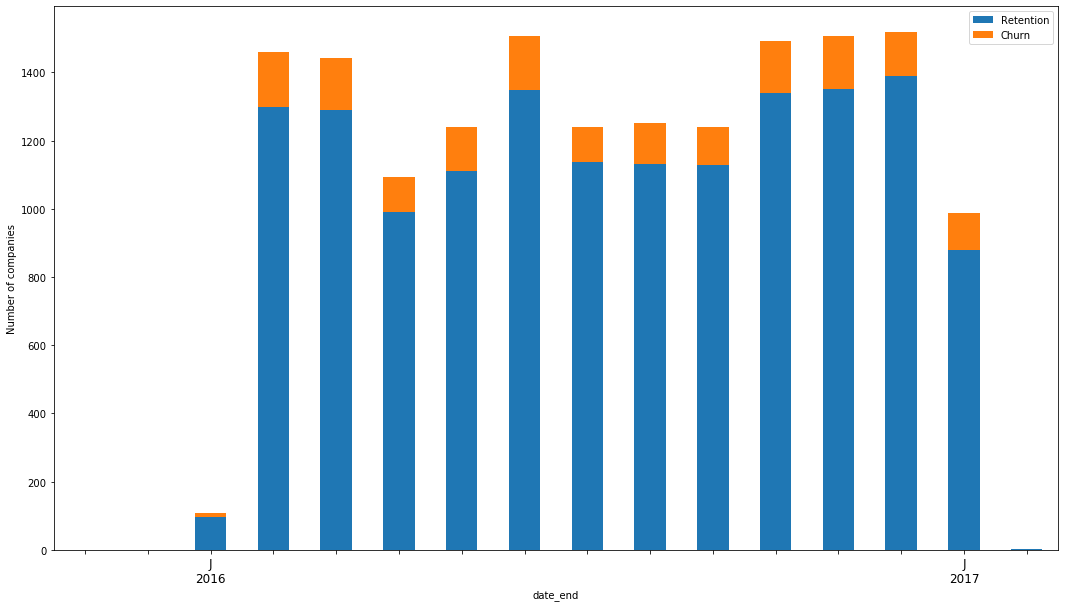

In [30]:
plot_dates(dates, "date_end")

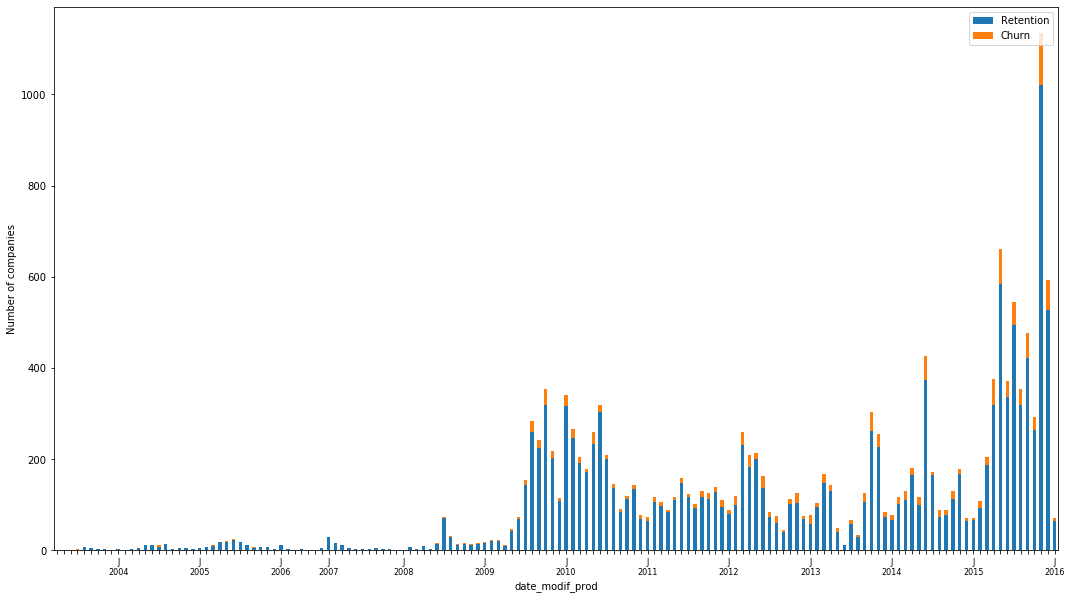

In [31]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

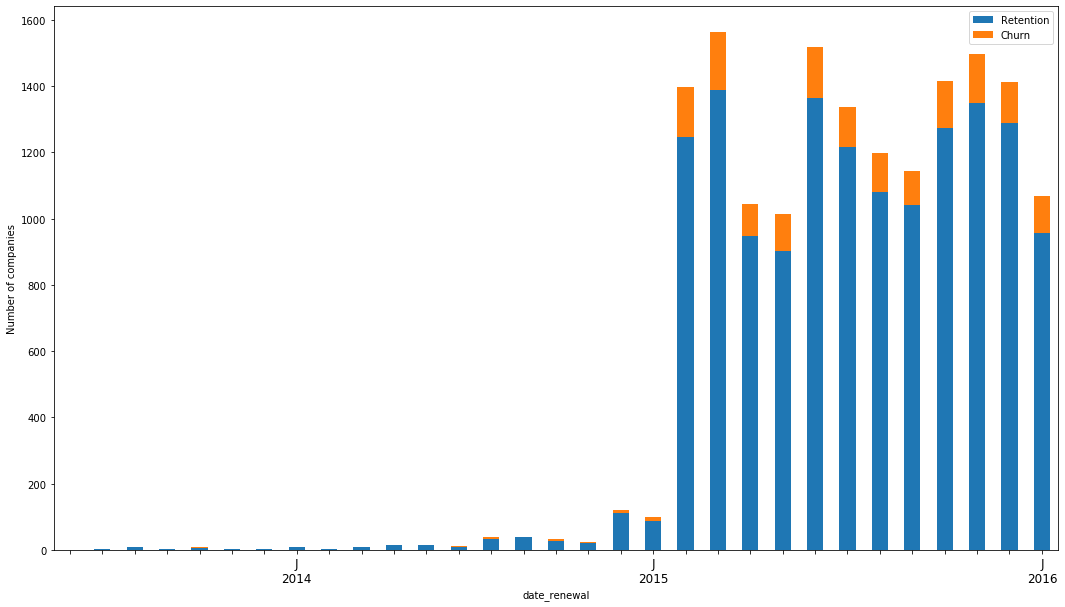

In [32]:
plot_dates(dates, "date_renewal")

# Forecast

In [33]:
forecast = train[["id","forecast_base_bill_ele","forecast_base_bill_year",
 "forecast_bill_12m","forecast_cons","forecast_cons_12m",
 "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
 "forecast_price_energy_p1","forecast_price_energy_p2",
 "forecast_price_pow_p1","churn"]]

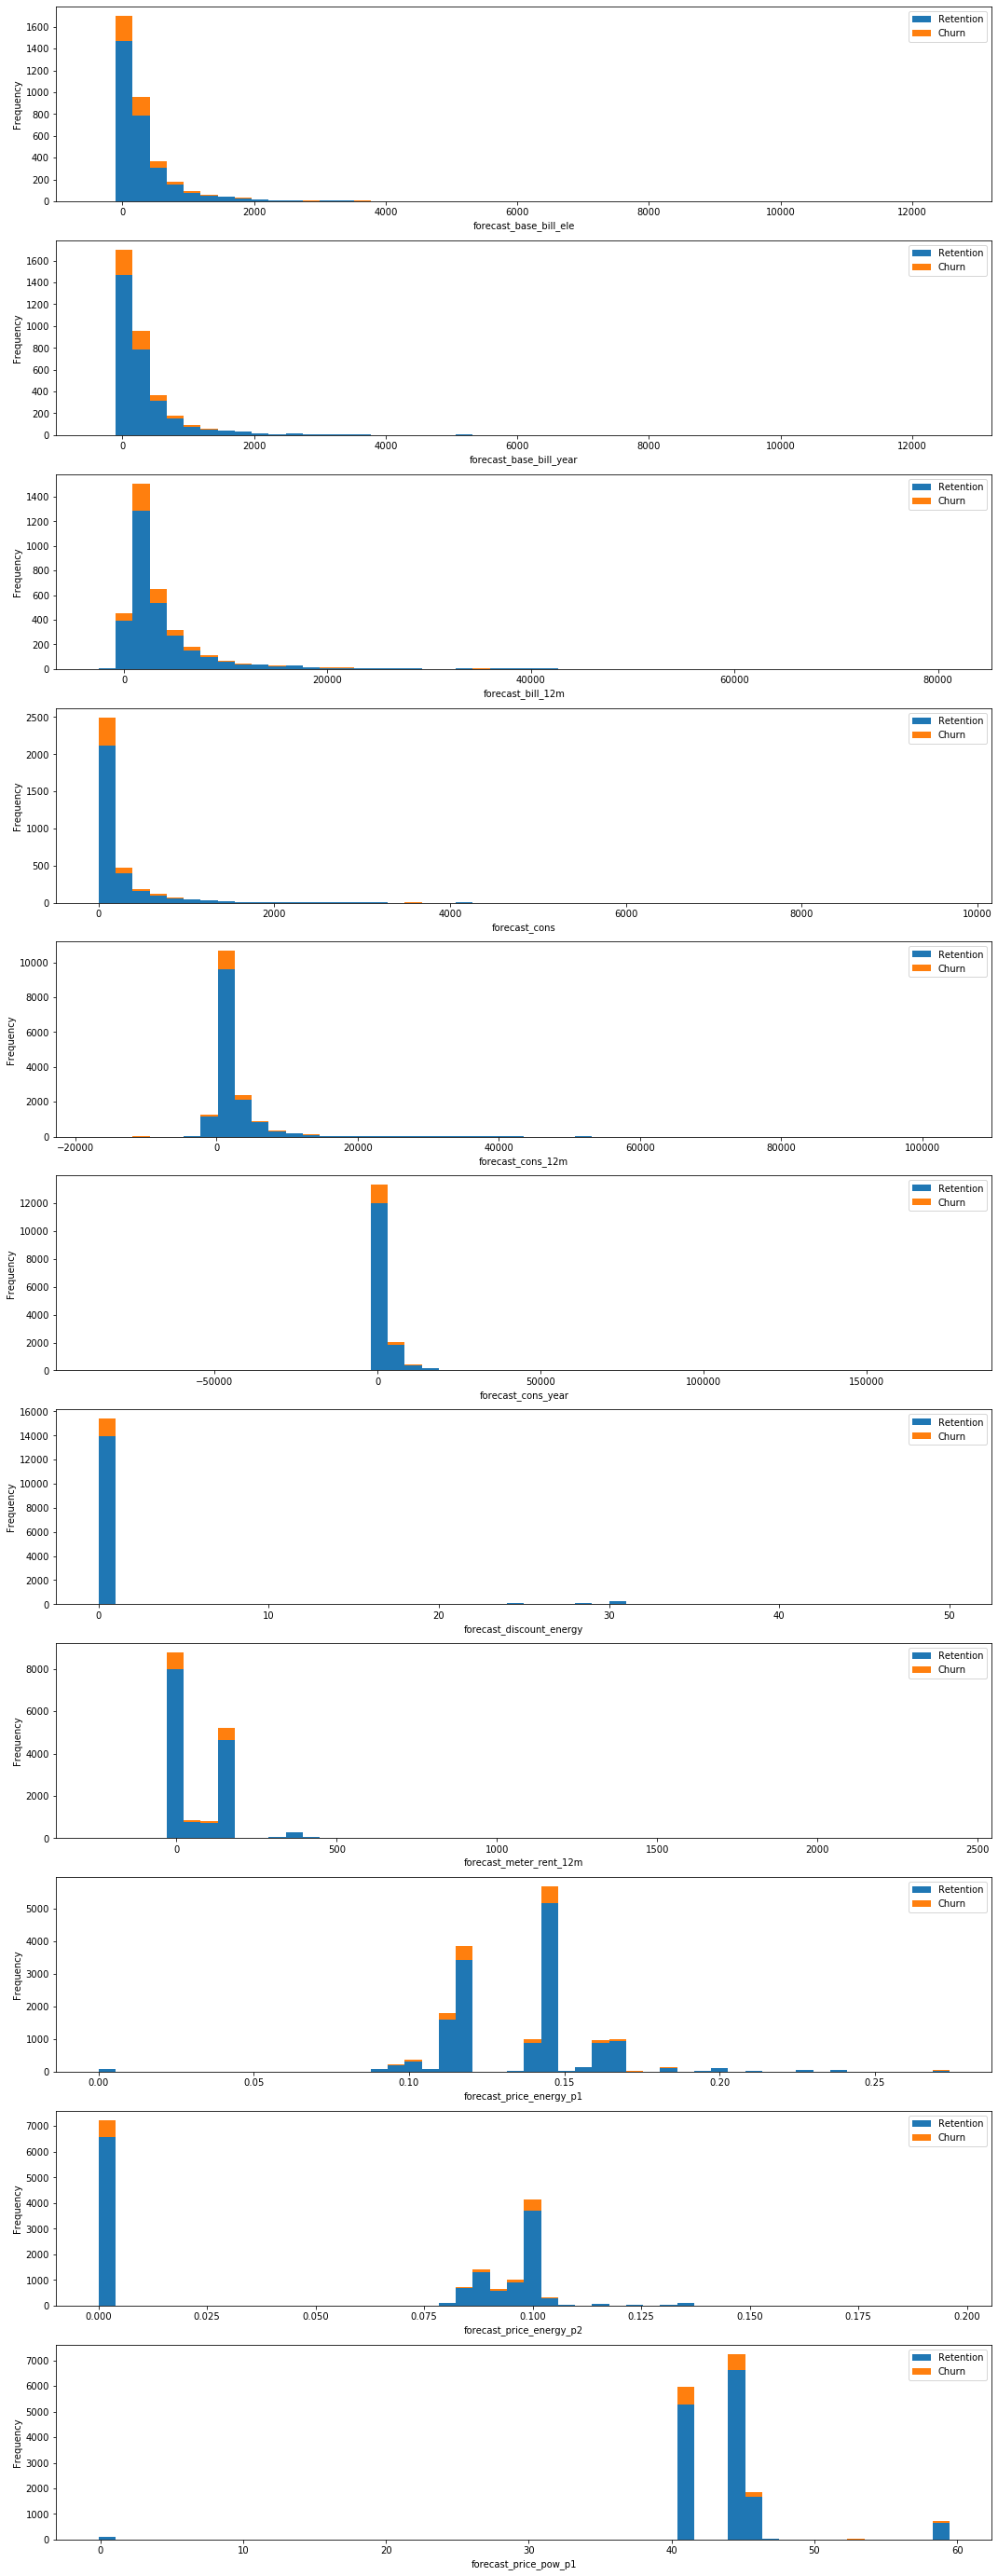

In [34]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
plot_distribution(train, "forecast_base_bill_ele", axs[0])
plot_distribution(train, "forecast_base_bill_year", axs[1])
plot_distribution(train, "forecast_bill_12m", axs[2])
plot_distribution(train, "forecast_cons", axs[3])
plot_distribution(train, "forecast_cons_12m", axs[4])
plot_distribution(train, "forecast_cons_year", axs[5])
plot_distribution(train, "forecast_discount_energy", axs[6])
plot_distribution(train, "forecast_meter_rent_12m", axs[7])
plot_distribution(train, "forecast_price_energy_p1", axs[8])
plot_distribution(train, "forecast_price_energy_p2", axs[9])
plot_distribution(train, "forecast_price_pow_p1", axs[10])

Similarly to the consumption plots, we can observe that a lot of the variables are highly skewed to the right, creating a very long tail on the higher
values

# Contract type (electricity, gas)

In [35]:
contract_type = train[["id", "has_gas", "churn"]]
contract = contract_type.groupby([contract_type["churn"],
 contract_type["has_gas"]])["id"].count().unstack(level=0)
contract

churn,0,1
has_gas,,
f,11771,1361
t,2730,234


In [36]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

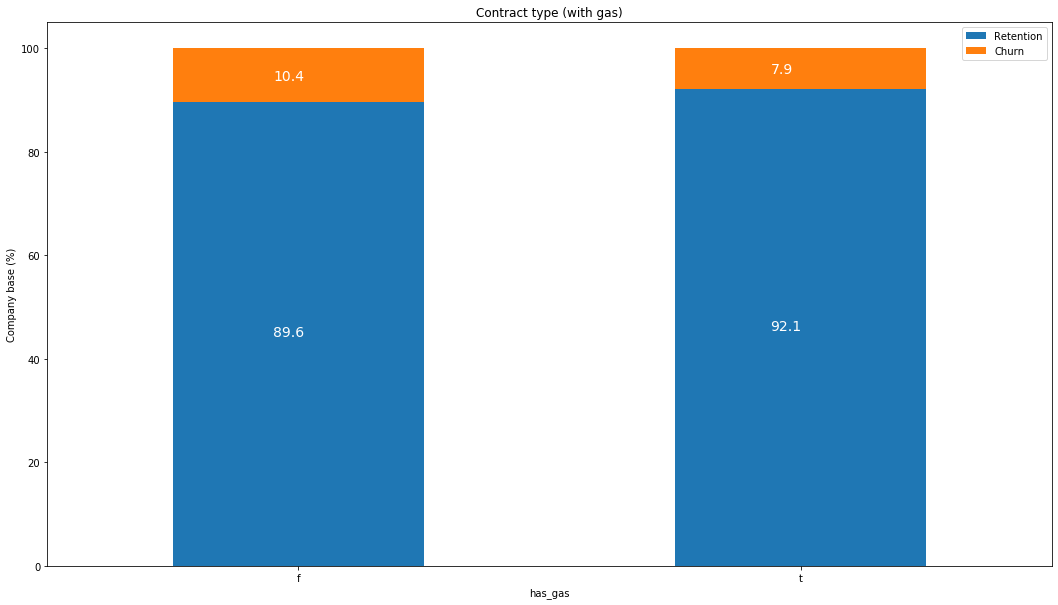

In [37]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

# Margins

In [38]:
margin = train[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]
margin

,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin
0,48ada52261e7cf58715202705a0451c9,-41.76,-41.76,1732.36
1,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99
2,d29c2c54acc38ff3c0614d0a653813dd,16.38,16.38,18.89
3,764c75f661154dac3a6c254cd082ea7d,28.60,28.60,6.60
4,bba03439a292a1e166f80264c16191cb,30.22,30.22,25.46
...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,27.88,27.88,381.77
16092,d0a6f71671571ed83b2645d23af6de00,0.00,0.00,90.34
16093,10e6828ddd62cbcf687cb74928c4c2d2,39.84,39.84,20.38
16094,1cf20fd6206d7678d5bcafd28c53b4db,13.08,13.08,0.96


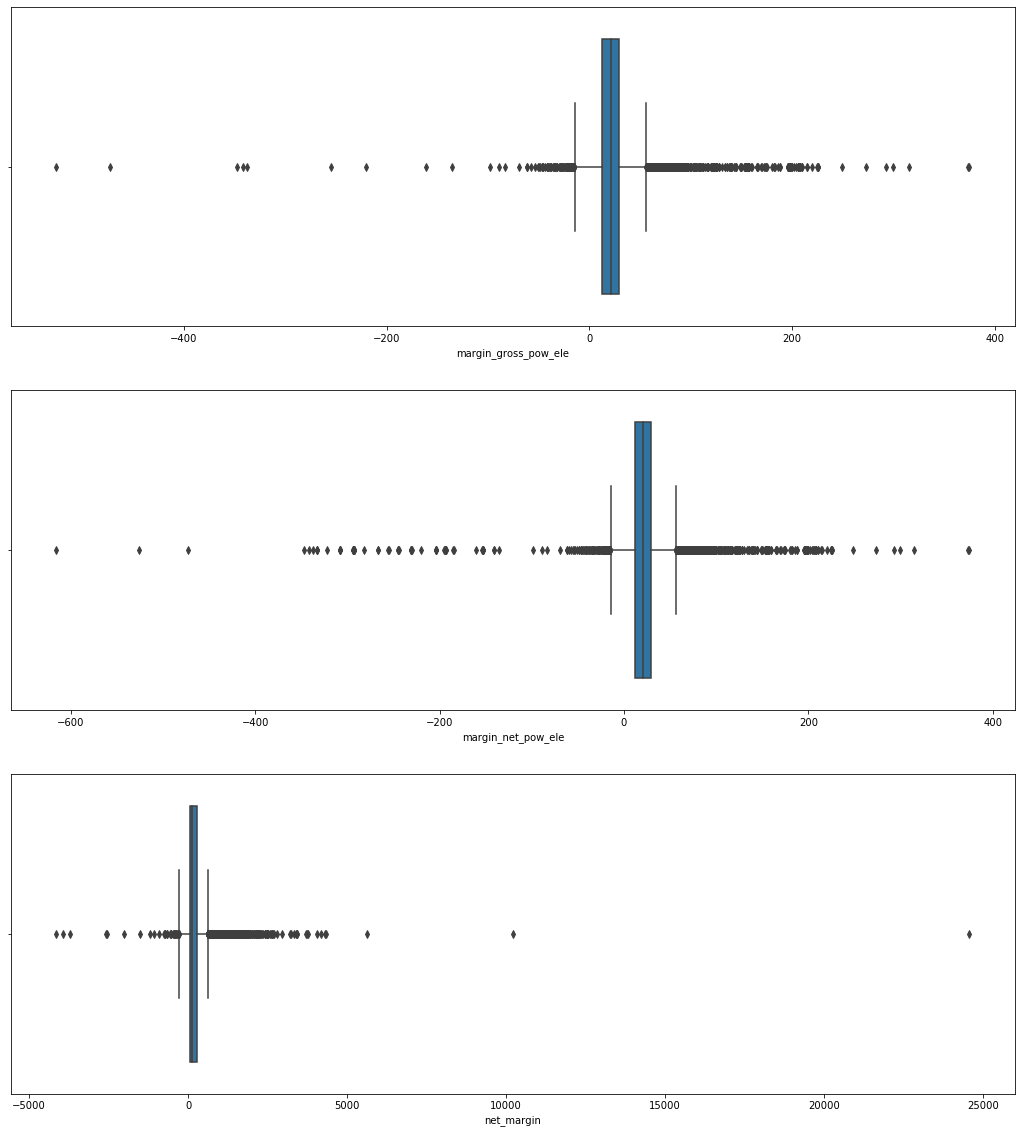

In [39]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

# Subscribed power

In [40]:
power = train[["id","pow_max", "churn"]].fillna(0)

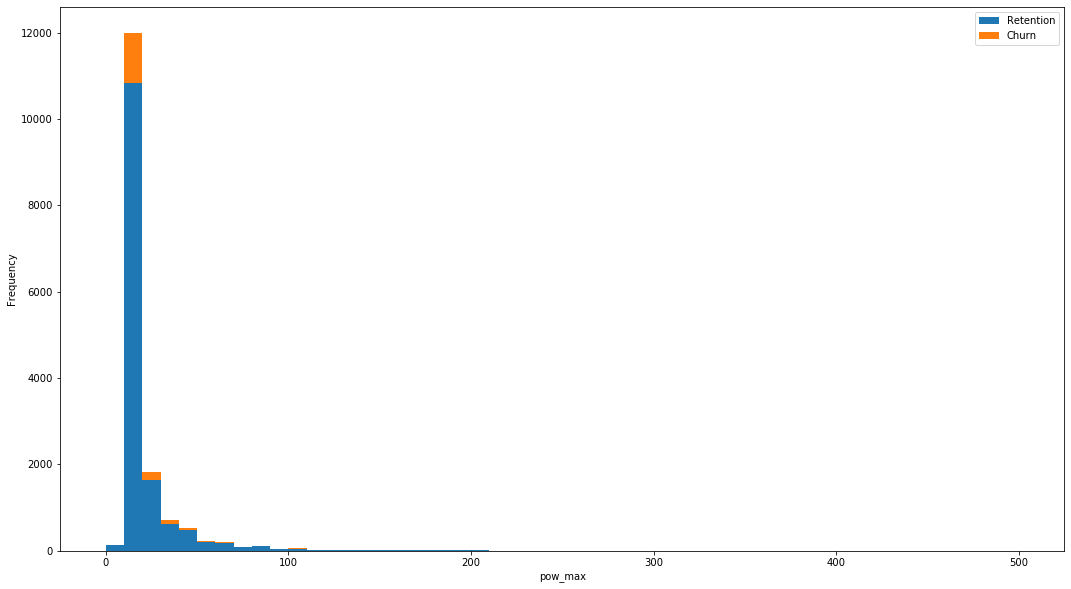

In [41]:
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

# Others

In [42]:
others = train[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

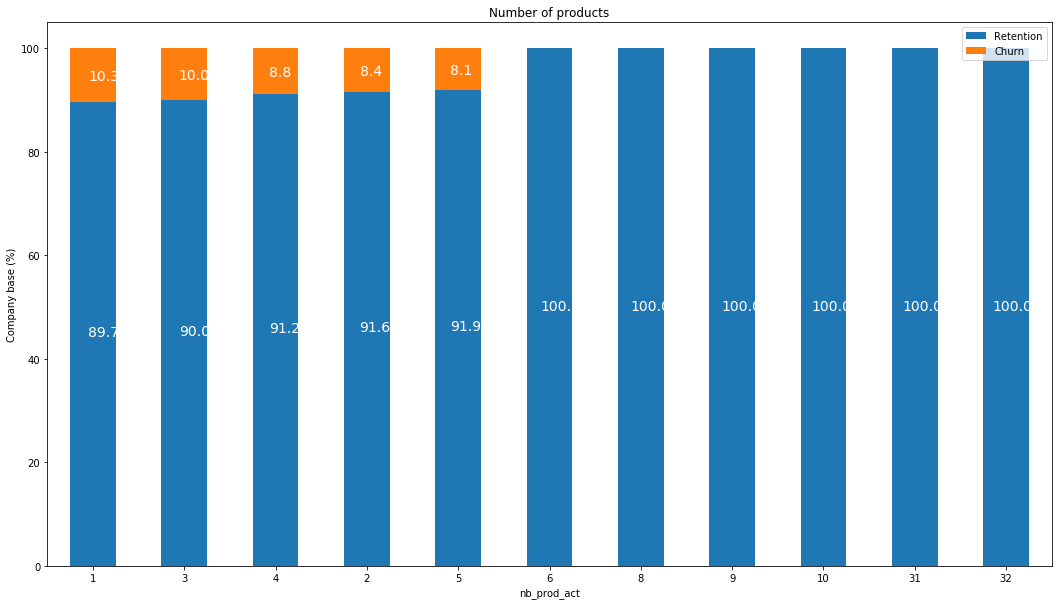

In [43]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

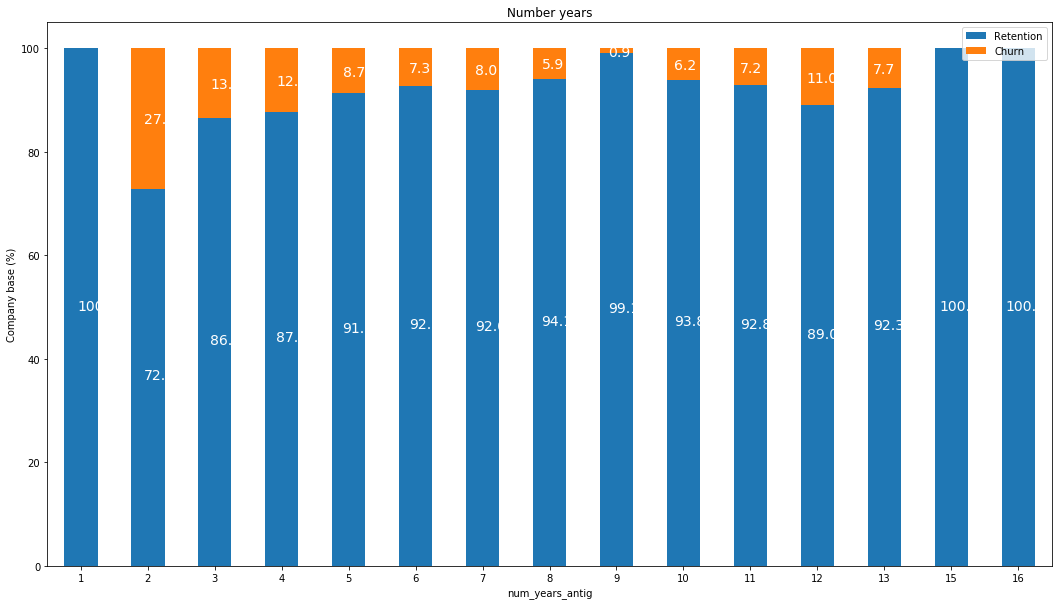

In [44]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

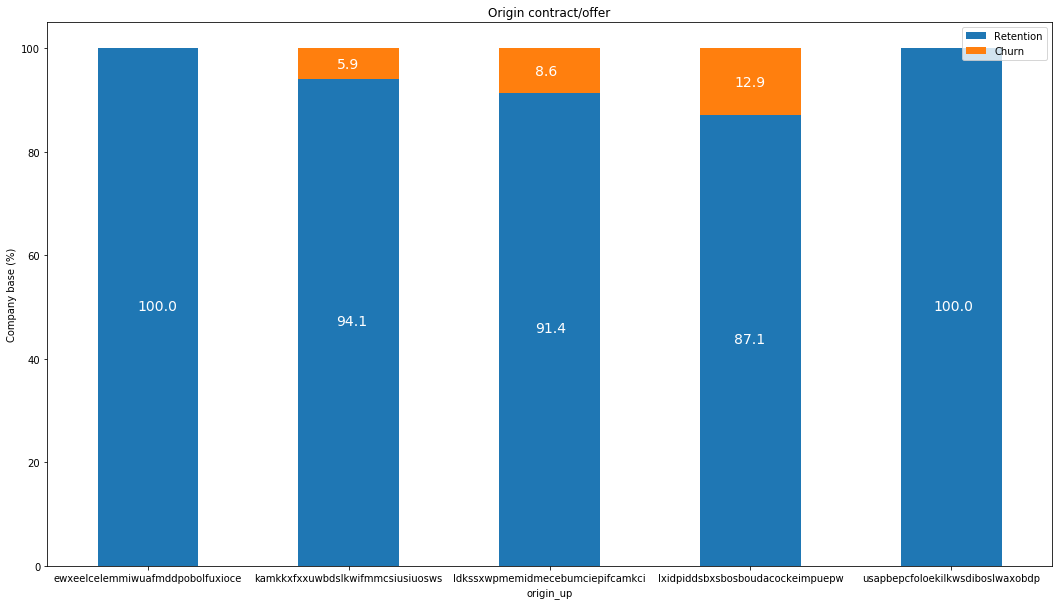

In [45]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

# 5. Data Cleaning

In [46]:
# Dropping variables with more than 60% missing values
train.drop(columns=["campaign_disc_ele", "date_first_activ",
 "forecast_base_bill_ele","forecast_base_bill_year",
"forecast_bill_12m", "forecast_cons"], inplace=True)

In [47]:
#Checking for duplicates
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


# 6. Formatting data

### Missing dates
There could be several ways in which we could deal with the missing dates.

One way, we could "engineer" the dates from known values. For example, the date_renewal is usually the same date as the date_modif_prod but one year ahead.

The simplest way, we will replace the missing values with the median (the most frequent date). 

For numerical values, the built-in function .median() can be used, but this will not work for dates or strings, so we will use a workaround using .value counts()

In [48]:
train.loc[train["date_modif_prod"].isnull(),"date_modif_prod"] = train["date_modif_prod"].value_counts().index[0]
train.loc[train["date_end"].isnull(),"date_end"] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(),"date_renewal"] = train["date_renewal"].value_counts().index[0]

### Missing data
We might have some prices missing for some companies and months

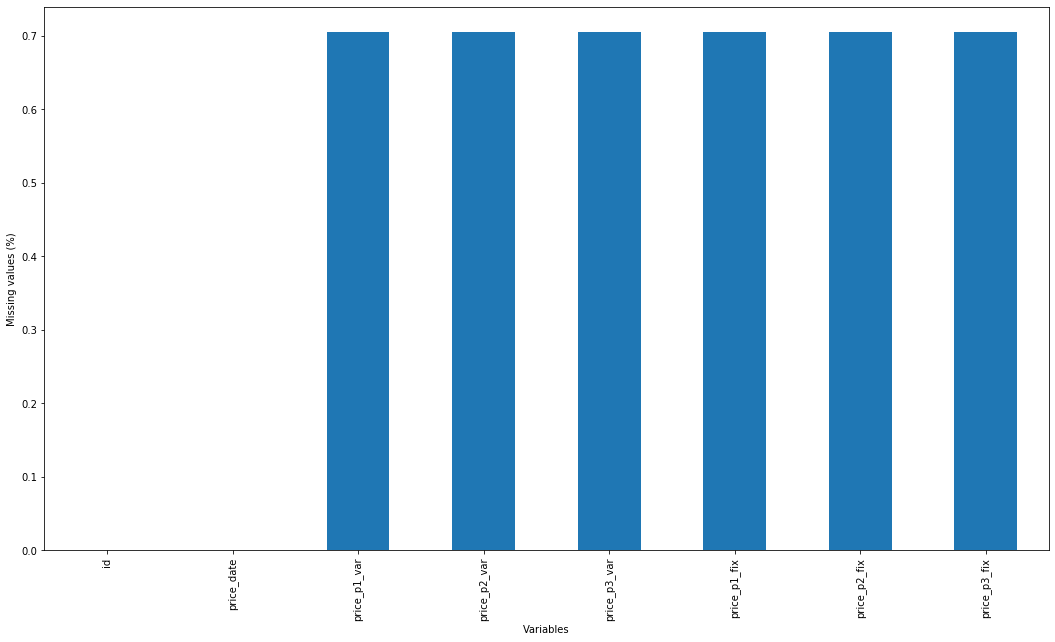

In [49]:
null_columns(df_hist).plot(kind="bar", figsize=(18,10))
# Set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

In [50]:
df_hist[df_hist.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_hist.loc[df_hist["price_p1_var"].isnull(),"price_p1_var"] = df_hist["price_p1_var"].median()
df_hist.loc[df_hist["price_p2_var"].isnull(),"price_p2_var"] = df_hist["price_p2_var"].median()
df_hist.loc[df_hist["price_p3_var"].isnull(),"price_p3_var"] = df_hist["price_p3_var"].median()
df_hist.loc[df_hist["price_p1_fix"].isnull(),"price_p1_fix"] = df_hist["price_p1_fix"].median()
df_hist.loc[df_hist["price_p2_fix"].isnull(),"price_p2_fix"] = df_hist["price_p2_fix"].median()
df_hist.loc[df_hist["price_p3_fix"].isnull(),"price_p3_fix"] = df_hist["price_p3_fix"].median()

### Formatting dates (train data)
In order to use the dates in our churn prediction model we are going to change the representation of these dates. 
Instead of using the date itself, we will be transforming it in number of months. In order to make this transformation we need to change the dates to datetime and create a reference date which will be January 2016 

In [52]:
# Transform date columns to datetime type
train["date_activ"] = pd.to_datetime(train["date_activ"], format='%Y-%m-%d')
train["date_end"] = pd.to_datetime(train["date_end"], format='%Y-%m-%d')
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"], format='%Y-%m-%d')
train["date_renewal"] = pd.to_datetime(train["date_renewal"], format='%Y-%m-%d')

### Formating dates (history data)

In [53]:
df_hist["price_date"] = pd.to_datetime(df_hist["price_date"], format='%Y-%m-%d')

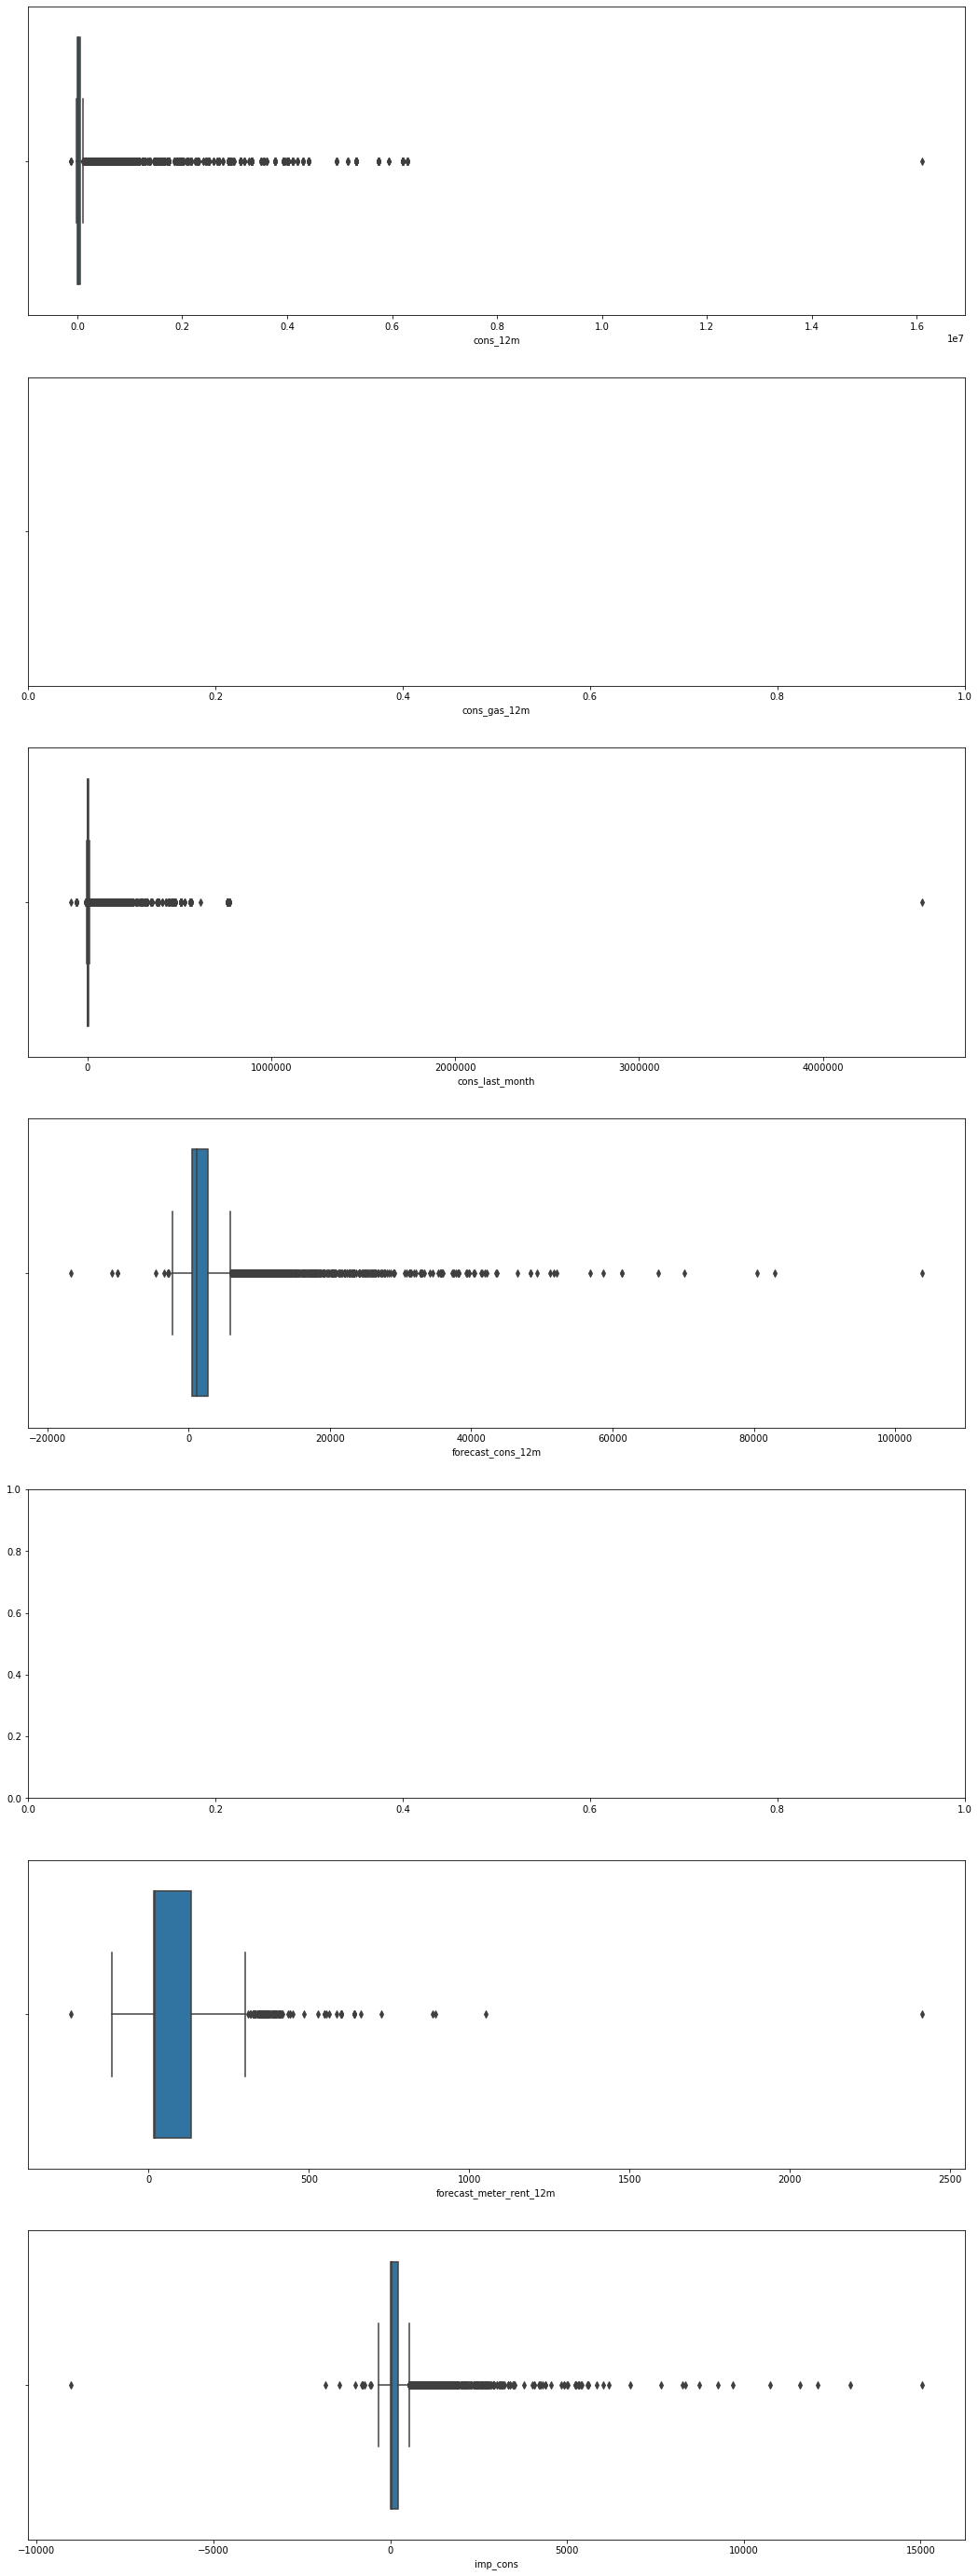

In [54]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

### Negative data

In [55]:
df_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see that there are negative values for price_p1_fix , price_p2_fix and price_p3_fix .

Further exploring on those we can see there are only about 10 entries which are negative. This is more likely to be due to corrupted data rather than a "price discount".

We will replace the negative values with the median (most frequent value)

In [56]:
df_hist[(df_hist.price_p1_fix < 0) | (df_hist.price_p2_fix < 0) | (df_hist.price_p3_fix < 0) ]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [57]:
df_hist.loc[df_hist["price_p1_fix"] < 0,"price_p1_fix"] = df_hist["price_p1_fix"].median()
df_hist.loc[df_hist["price_p2_fix"] < 0,"price_p2_fix"] = df_hist["price_p2_fix"].median()
df_hist.loc[df_hist["price_p3_fix"] < 0,"price_p3_fix"] = df_hist["price_p3_fix"].median()

In [58]:
#tmp=df_hist.loc[df_hist['price_p1_var'].isnull(),['price_date','price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']]

# 7. Feature Engineering

Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year

In [59]:
mean_year = df_hist.groupby(["id"]).mean().reset_index()

In [60]:
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
 "price_p2_var": "mean_year_price_p2_var",
"price_p3_var": "mean_year_price_p3_var",
"price_p1_fix": "mean_year_price_p1_fix",
"price_p2_fix": "mean_year_price_p2_fix",
"price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

The exploration of the churn by date was quite shallow and did not provide us with any relevant insight. But we can combine date variables and create a new one

In [61]:
import numpy as np
train["tenure"] = ((train["date_end"]-train["date_activ"])/ np.timedelta64(1, "Y")).astype(int)

In [62]:
tenure = train[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

In [63]:
tenure

churn,0,1
tenure,,
0,1.0,NaN
2,262.0,40.0
3,1178.0,193.0
4,3632.0,535.0
5,3010.0,297.0
6,3052.0,269.0
7,2649.0,210.0
8,162.0,11.0
9,94.0,2.0


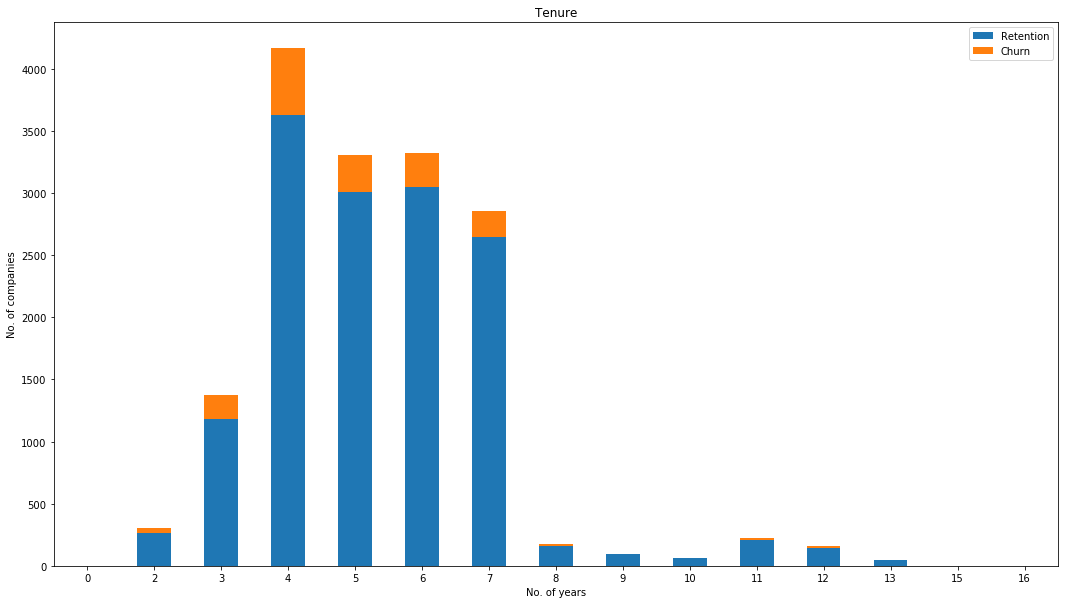

In [64]:
tenure.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Tenure")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

We can clearly that churn is very low for companies which joined recently or that have made the contract a long time ago. With the higher number of
churners within the 3-7 years of tenure.

We will also transform the dates provided in such a way that we can make more sense out of those.

**months_activ** : Number of months active until reference date (Jan 2016)

**months_to_end** : Number of months of the contract left at reference date (Jan 2016)

**months_modif_prod** : Number of months since last modification at reference date (Jan 2016)

**months_renewal** : Number of months since last renewal at reference date (Jan 2016)

To create the month column we will follow a simple process:
1. Substract the reference date and the column date
2. Convert the timedelta in months
3. Convert to integer (we are not interested in having decimal months)

In [65]:
def convert_months(reference_date, dataframe, column):
 """
 Input a column with timedeltas and return months
 """
 time_delta = REFERENCE_DATE - dataframe[column]
 months = (time_delta / np.timedelta64(1, "M")).astype(int)
 return months

In [66]:
import datetime
# Create reference date as provided on the exercise statement
REFERENCE_DATE = datetime.datetime(2016,1,1)

train["months_activ"] = convert_months(REFERENCE_DATE, train, "date_activ")
train["months_to_end"] = -convert_months(REFERENCE_DATE, train, "date_end")
train["months_modif_prod"] = convert_months(REFERENCE_DATE, train, "date_modif_prod")
train["months_renewal"] = convert_months(REFERENCE_DATE, train, "date_renewal")

In [67]:
def plot_churn_by_month(dataframe, column, fontsize_=11):
    """
    Plot churn distribution by monthly variable
    """
    temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
    temp.plot(kind="bar",
    figsize=(18,10),
    stacked=True,
    rot=0,
    title= column)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    # Labels
    plt.ylabel("No. of companies")
    plt.xlabel("No. of months")
    # Set xlabel fontsize
    plt.xticks(fontsize=fontsize_)
    plt.show()

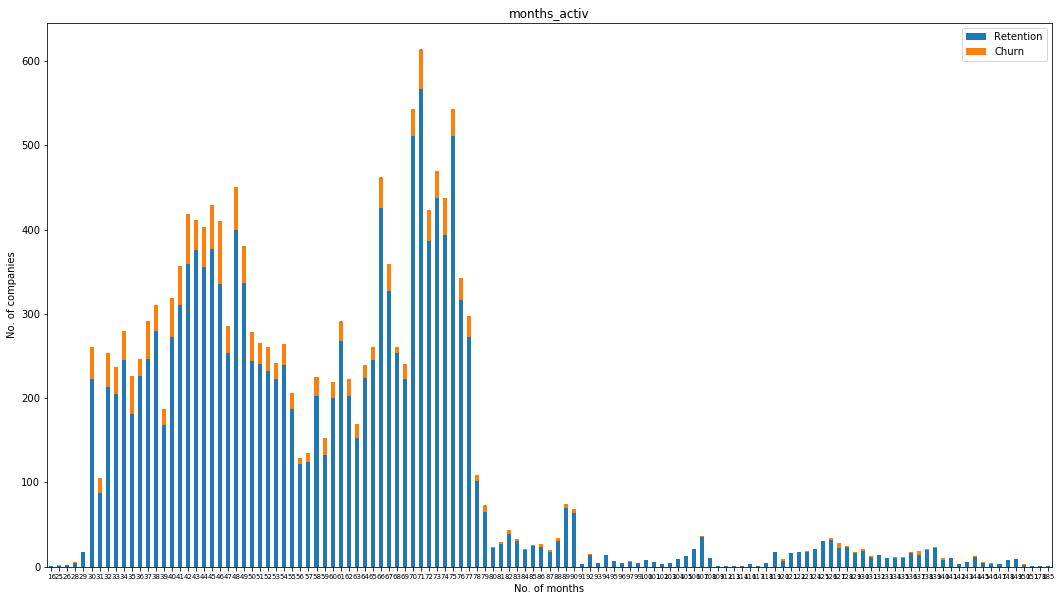

In [68]:
plot_churn_by_month(train, "months_activ", 7)

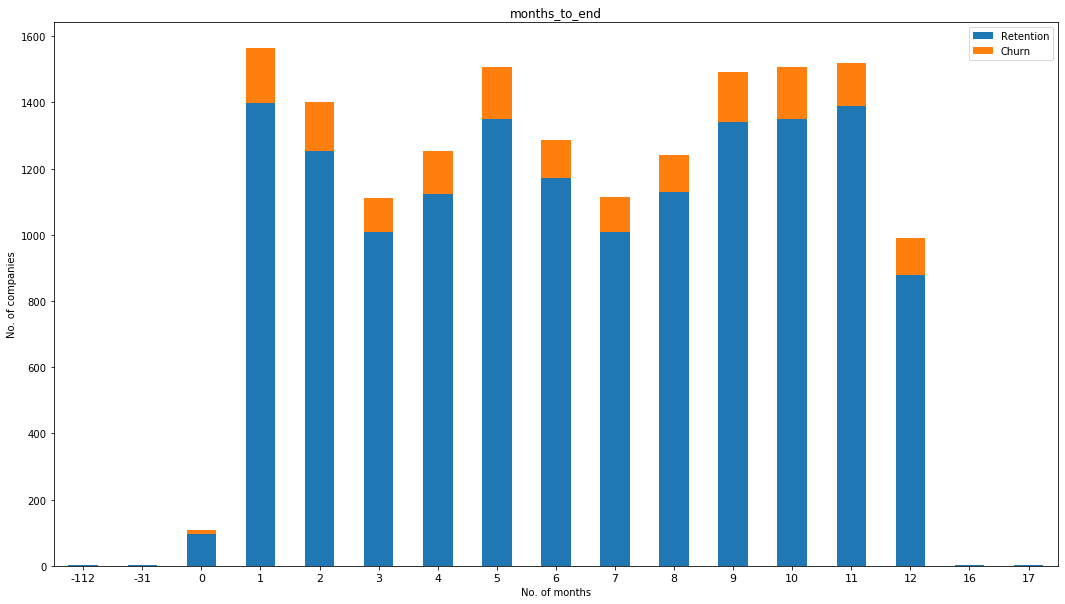

In [69]:
plot_churn_by_month(train, "months_to_end")

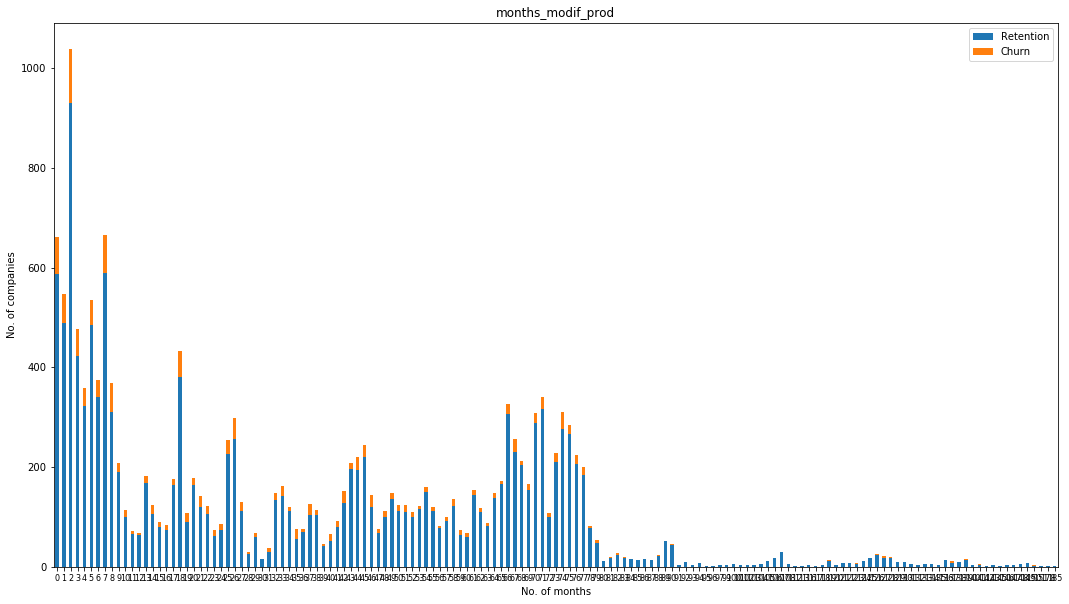

In [70]:
plot_churn_by_month(train, "months_modif_prod", 8)

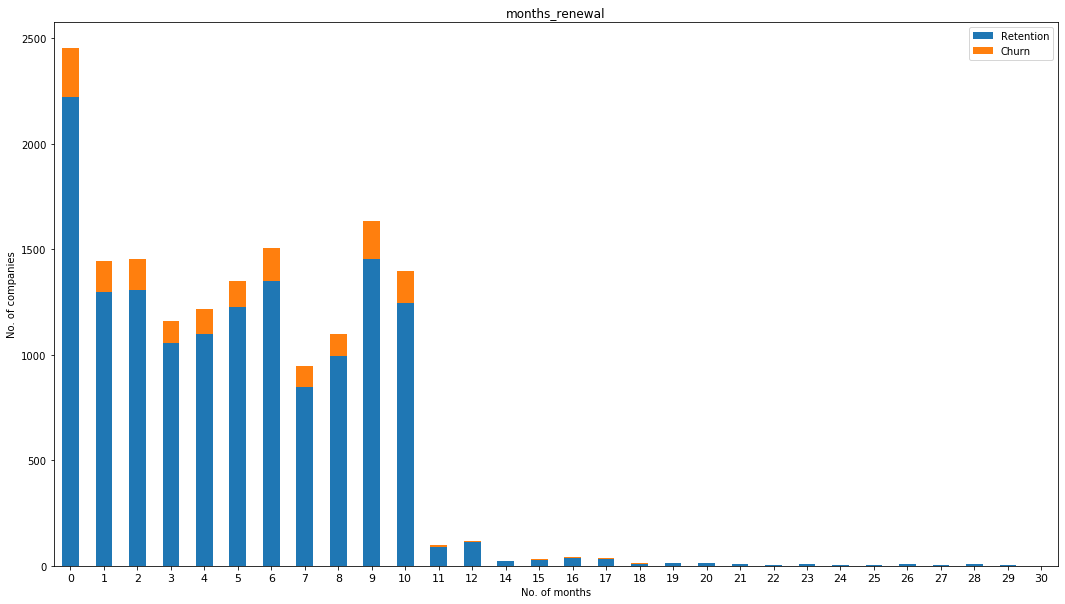

In [71]:
plot_churn_by_month(train, "months_renewal")

In [72]:
#Remove the date columns
train.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

In [73]:
#Transforming boolean data
train["has_gas"]=train["has_gas"].replace(["t", "f"],[1,0])

# 7A. Work with categorical data

#### Channel_sales

In [74]:
#replace the Nan values with a string called null_values_channel
train["channel_sales"] = train["channel_sales"].fillna("null_values_channel")

In [75]:
# Transform to categorical data type
train["channel_sales"] = train["channel_sales"].astype("category")

In [76]:
pd.DataFrame({"Samples in category": train["channel_sales"].value_counts()})

,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


In [77]:
# Create dummy variables
categories_channel = pd.get_dummies(train["channel_sales"], prefix = "channel")

In [78]:
# Rename columns for simplicity
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]

In [79]:
categories_channel.head(5)

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [80]:
#Multicollinearity
categories_channel.drop(columns=["channel_nul"],inplace=True)

##### Origin_up

In [81]:
train["origin_up"] = train["origin_up"].fillna("null_values_origin")
train["origin_up"] = train["origin_up"].astype("category")

In [82]:
pd.DataFrame({"Samples in category": train["origin_up"].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [83]:
# Create dummy variables
categories_origin = pd.get_dummies(train["origin_up"], prefix = "origin")
# Rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]

In [84]:
categories_origin.head(5)

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [85]:
categories_origin.drop(columns=["origin_nul"],inplace=True)

#### activity_new

In [86]:
train["activity_new"] = train["activity_new"].fillna("null_values_activity")

In [87]:
categories_activity = pd.DataFrame({"Activity samples":train["activity_new"].value_counts()})
categories_activity

,Activity samples
null_values_activity,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
...,...
dbklukmppmseoekmmxfolmfbdidmawls,1
kkkmlicifclosfkbxodcmsaweebkolde,1
xpwokbdseslumlsislulloalddkioslw,1
falcdfadiaxaafmplkebedawlaifficp,1


As we can see below there are too many categories with very few number of samples. So we will replace any category with less than 75 samples as
null_values_category

In [88]:
# Get the categories with less than 75 samples
to_replace = list(categories_activity[categories_activity["Activity samples"] <= 75].index)
# Replace them with `null_values_categories`
train["activity_new"]=train["activity_new"].replace(to_replace,"null_values_activity")

In [89]:
# Create dummy variables
categories_activity = pd.get_dummies(train["activity_new"], prefix = "activity")
# Rename columns for simplicity
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]

In [90]:
categories_activity.head(5)

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [91]:
categories_activity.drop(columns=["activity_nul"],inplace=True)

#### Merge dummy variables to main dataframe
We will merge all the new categories into our main dataframe and remove the old categorical columns

In [92]:
# Use common index to merge
train = pd.merge(train, categories_channel, left_index=True, right_index=True)
train = pd.merge(train, categories_origin, left_index=True, right_index=True)
train = pd.merge(train, categories_activity, left_index=True, right_index=True)

In [93]:
train.drop(columns=["channel_sales", "origin_up", "activity_new"],inplace=True)

# 8A. Log transformation

Some predective models make fundamental assumptions related to variables being "normally distributed". Hence, the model will perform poorly if the data is highly skewed.

There are several methods in which we can reduce skewness such as square root , cube root , and log . In this case, we will use a log transformation which is usually recommended for right skewed data.

In [94]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,...,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,...,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Particularly relevant to look at the standard deviation std which is very very high for some variables.

- Log transformation does not work with negative data, so we will convert the negative values to NaN .

- Also we cannot apply a log transformation to 0 valued entries, so we will add a constant 1

In [95]:
# Remove negative values
train.loc[train.cons_12m < 0,"cons_12m"] = np.nan
train.loc[train.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
train.loc[train.cons_last_month < 0,"cons_last_month"] = np.nan
train.loc[train.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
train.loc[train.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
train.loc[train.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
train.loc[train.imp_cons < 0,"imp_cons"] = np.nan

In [96]:
# Apply log10 transformation
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1)
train["cons_last_month"] = np.log10(train["cons_last_month"]+1)
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1)
train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1)
train["forecast_meter_rent_12m"] = np.log10(train["forecast_meter_rent_12m"]+1)
train["imp_cons"] = np.log10(train["imp_cons"]+1)

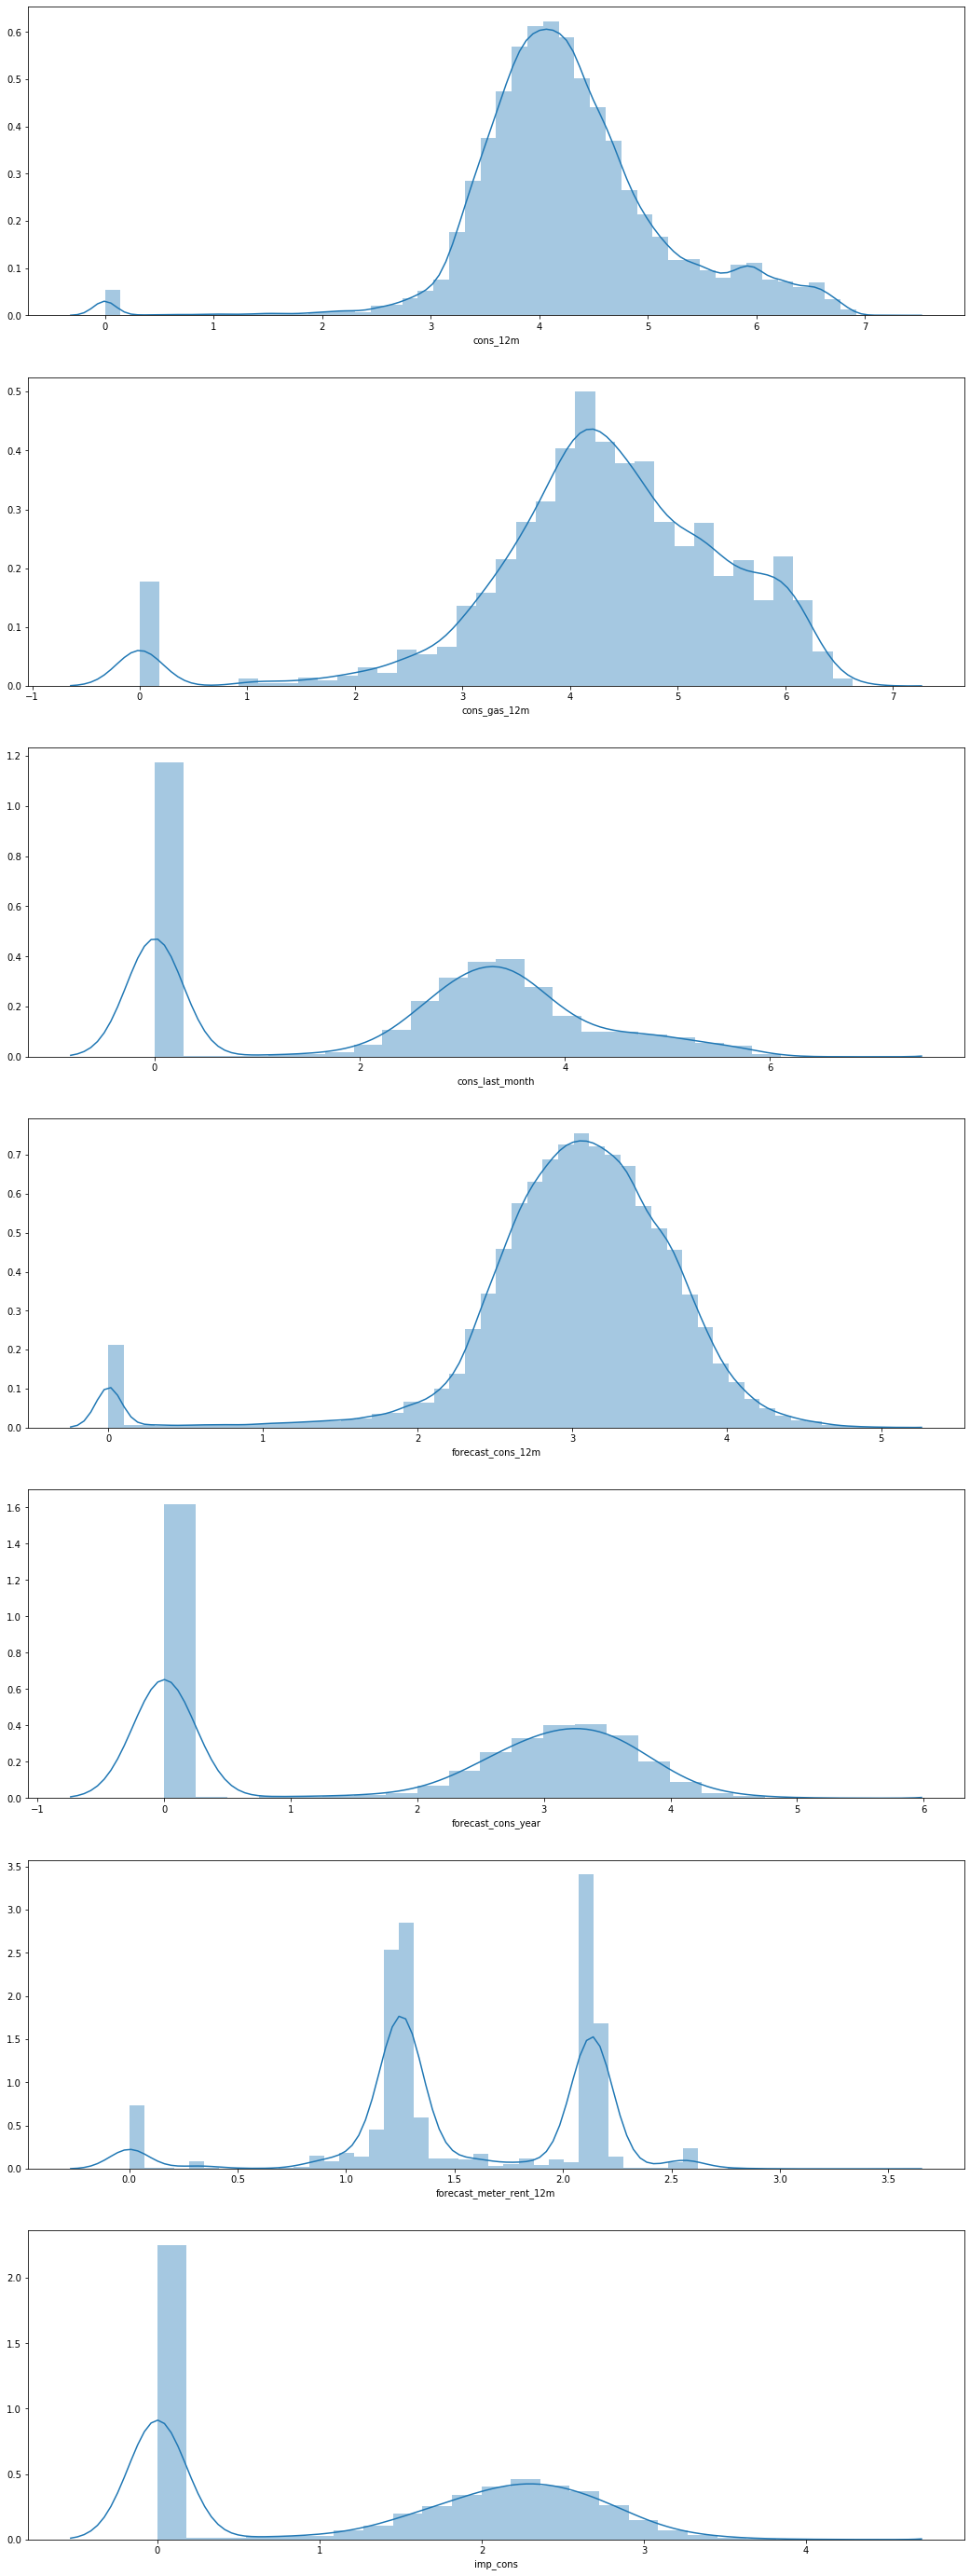

In [97]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((train["cons_12m"].dropna()), ax=axs[0])
sns.distplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

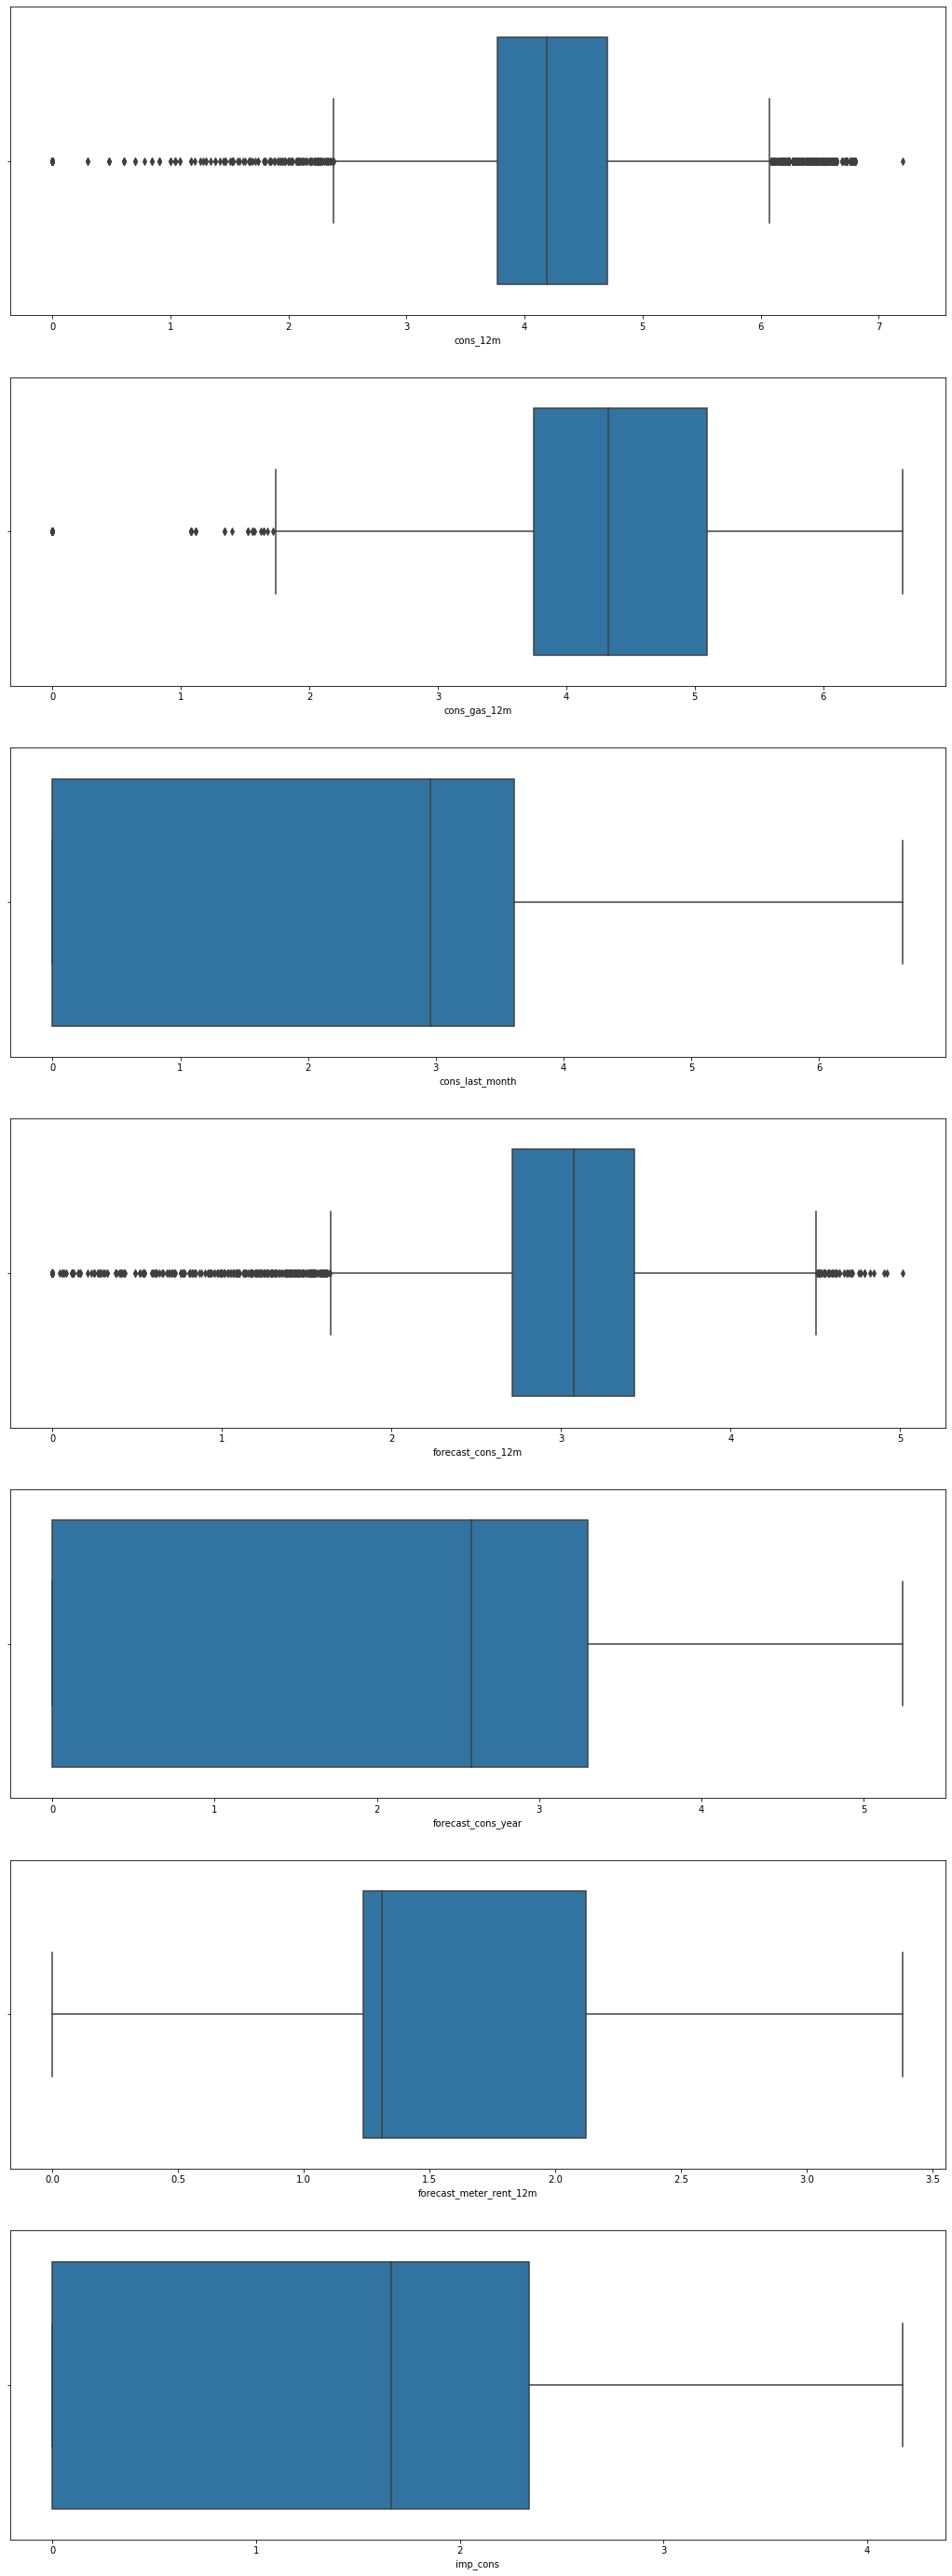

In [98]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [99]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,15970.000000,16092.000000,15970.000000,15970.000000,15970.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.283812,0.800300,2.359281,3.006826,1.869956,0.991547,1.549610,0.135901,0.052951,43.533496,...,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,0.915265,1.748833,1.789067,0.709778,1.612963,5.160969,0.589394,0.026252,0.048617,5.212252,...,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,1.310481,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,2.122126,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,3.382502,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The distributions look much closer to normal distributions now!

Notice how the standard deviation std has changed.

From the boxplots we can still see some values are quite far from the range ( outliers ). We will deal with them later.

## High correlation variables

In [100]:
# Calculate correlation of variables
correlation = mean_year.corr()

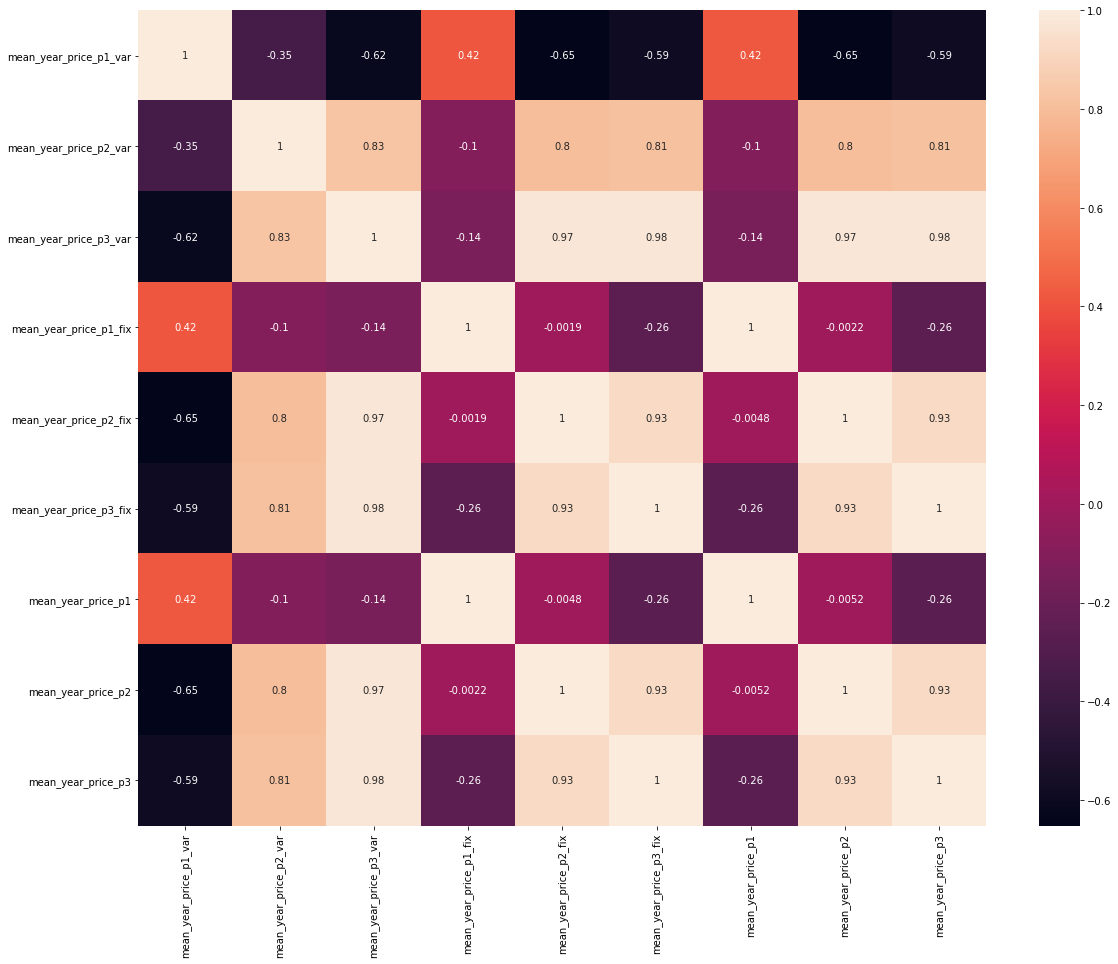

In [101]:
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [102]:
 # Calculate correlation of variables
correlation = train.corr()

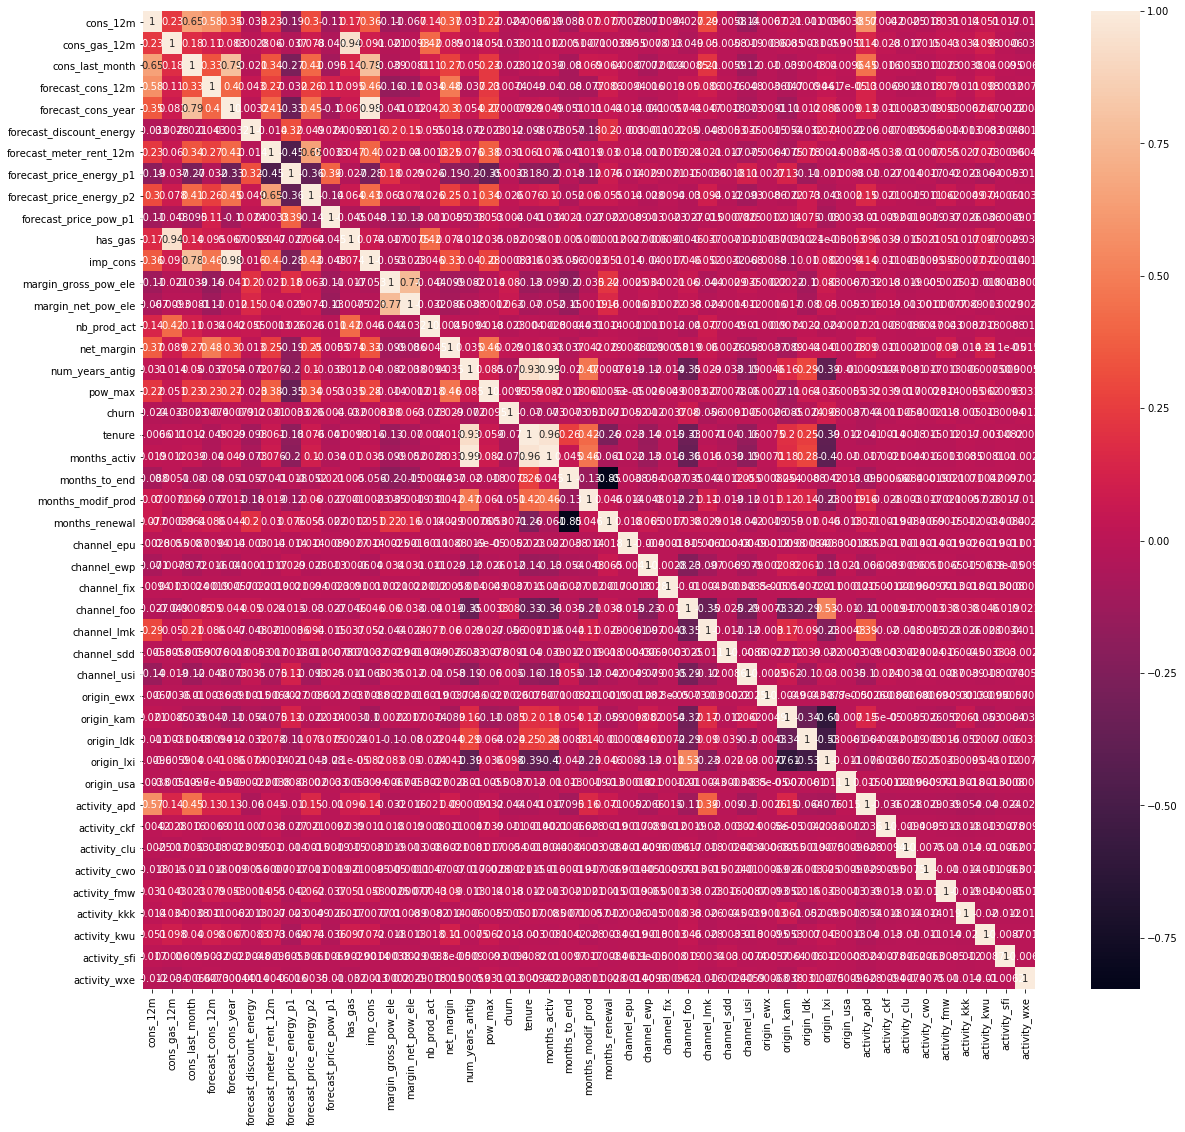

In [103]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

num_years_antig has a high correlation with months_activ (it provides us the same information).
We can remove variables with very high correlation.

In [104]:
train.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

# 8B. Removing outliers

There are several ways to handle with those outliers such as removing them (this works well for massive datasets) or replacing them with sensible data
(works better when the dataset is not that big).
We will replace the outliers with the mean (average of the values excluding outliers).

In [105]:
def replace_outliers_z_score(dataframe, column, Z=3):
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

    # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [106]:
for c in mean_year.columns:
    if c != "id":
        mean_year = replace_outliers_z_score(mean_year,c)

Replaced: 276  outliers in  mean_year_price_p1_var
Replaced: 0  outliers in  mean_year_price_p2_var
Replaced: 0  outliers in  mean_year_price_p3_var
Replaced: 120  outliers in  mean_year_price_p1_fix
Replaced: 0  outliers in  mean_year_price_p2_fix
Replaced: 0  outliers in  mean_year_price_p3_fix
Replaced: 122  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [107]:
mean_year.reset_index(drop=True, inplace=True)

In [108]:
 def _find_outliers_iqr(dataframe, column):
    """
    Find outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column

    Returns
    -------
    Dict
    With the values of the iqr, lower_bound and upper_bound
    """
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    return results
def remove_outliers_iqr(dataframe, column):
    """
    Remove outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """

    outliers = _find_outliers_iqr(dataframe, column)
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
    (dataframe[column] > outliers["upper_bound"])].shape

    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
    (dataframe[column] < outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers")
    return dataframe
def remove_outliers_z_score(dataframe, column, Z=3):
    """
    Remove outliers using the Z score. Values with more than 3 are removed.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    dataframe["zscore"] = zscore(dataframe[column])

    removed = dataframe[(dataframe["zscore"] < -Z) |
    (dataframe["zscore"] > Z)].shape

    dataframe = dataframe[(dataframe["zscore"] > -Z) &
    (dataframe["zscore"] < Z)]

    print("Removed:", removed[0], " outliers of ", column)

    return dataframe.drop(columns="zscore")

In [109]:
train = replace_outliers_z_score(train,"cons_12m")
train = replace_outliers_z_score(train,"cons_gas_12m")
train = replace_outliers_z_score(train,"cons_last_month")
train = replace_outliers_z_score(train,"forecast_cons_12m")
#train = replace_outliers_z_score(train,"forecast_cons_year")
train = replace_outliers_z_score(train,"forecast_discount_energy")
train = replace_outliers_z_score(train,"forecast_meter_rent_12m")
train = replace_outliers_z_score(train,"forecast_price_energy_p1")
train = replace_outliers_z_score(train,"forecast_price_energy_p2")
train = replace_outliers_z_score(train,"forecast_price_pow_p1")
train = replace_outliers_z_score(train,"imp_cons")
train = replace_outliers_z_score(train,"margin_gross_pow_ele")
train = replace_outliers_z_score(train,"margin_net_pow_ele")
train = replace_outliers_z_score(train,"net_margin")
train = replace_outliers_z_score(train,"pow_max")
train = replace_outliers_z_score(train,"months_activ")
train = replace_outliers_z_score(train,"months_to_end")
train = replace_outliers_z_score(train,"months_modif_prod")
train = replace_outliers_z_score(train,"months_renewal")

Replaced: 174  outliers in  cons_12m
Replaced: 118  outliers in  cons_gas_12m
Replaced: 0  outliers in  cons_last_month
Replaced: 425  outliers in  forecast_cons_12m
Replaced: 575  outliers in  forecast_discount_energy
Replaced: 1  outliers in  forecast_meter_rent_12m
Replaced: 300  outliers in  forecast_price_energy_p1
Replaced: 0  outliers in  forecast_price_energy_p2
Replaced: 240  outliers in  forecast_price_pow_p1
Replaced: 0  outliers in  imp_cons
Replaced: 238  outliers in  margin_gross_pow_ele
Replaced: 220  outliers in  margin_net_pow_ele
Replaced: 185  outliers in  net_margin
Replaced: 293  outliers in  pow_max
Replaced: 462  outliers in  months_activ
Replaced: 2  outliers in  months_to_end
Replaced: 156  outliers in  months_modif_prod
Replaced: 133  outliers in  months_renewal


In [110]:
train.reset_index(drop=True, inplace=True)

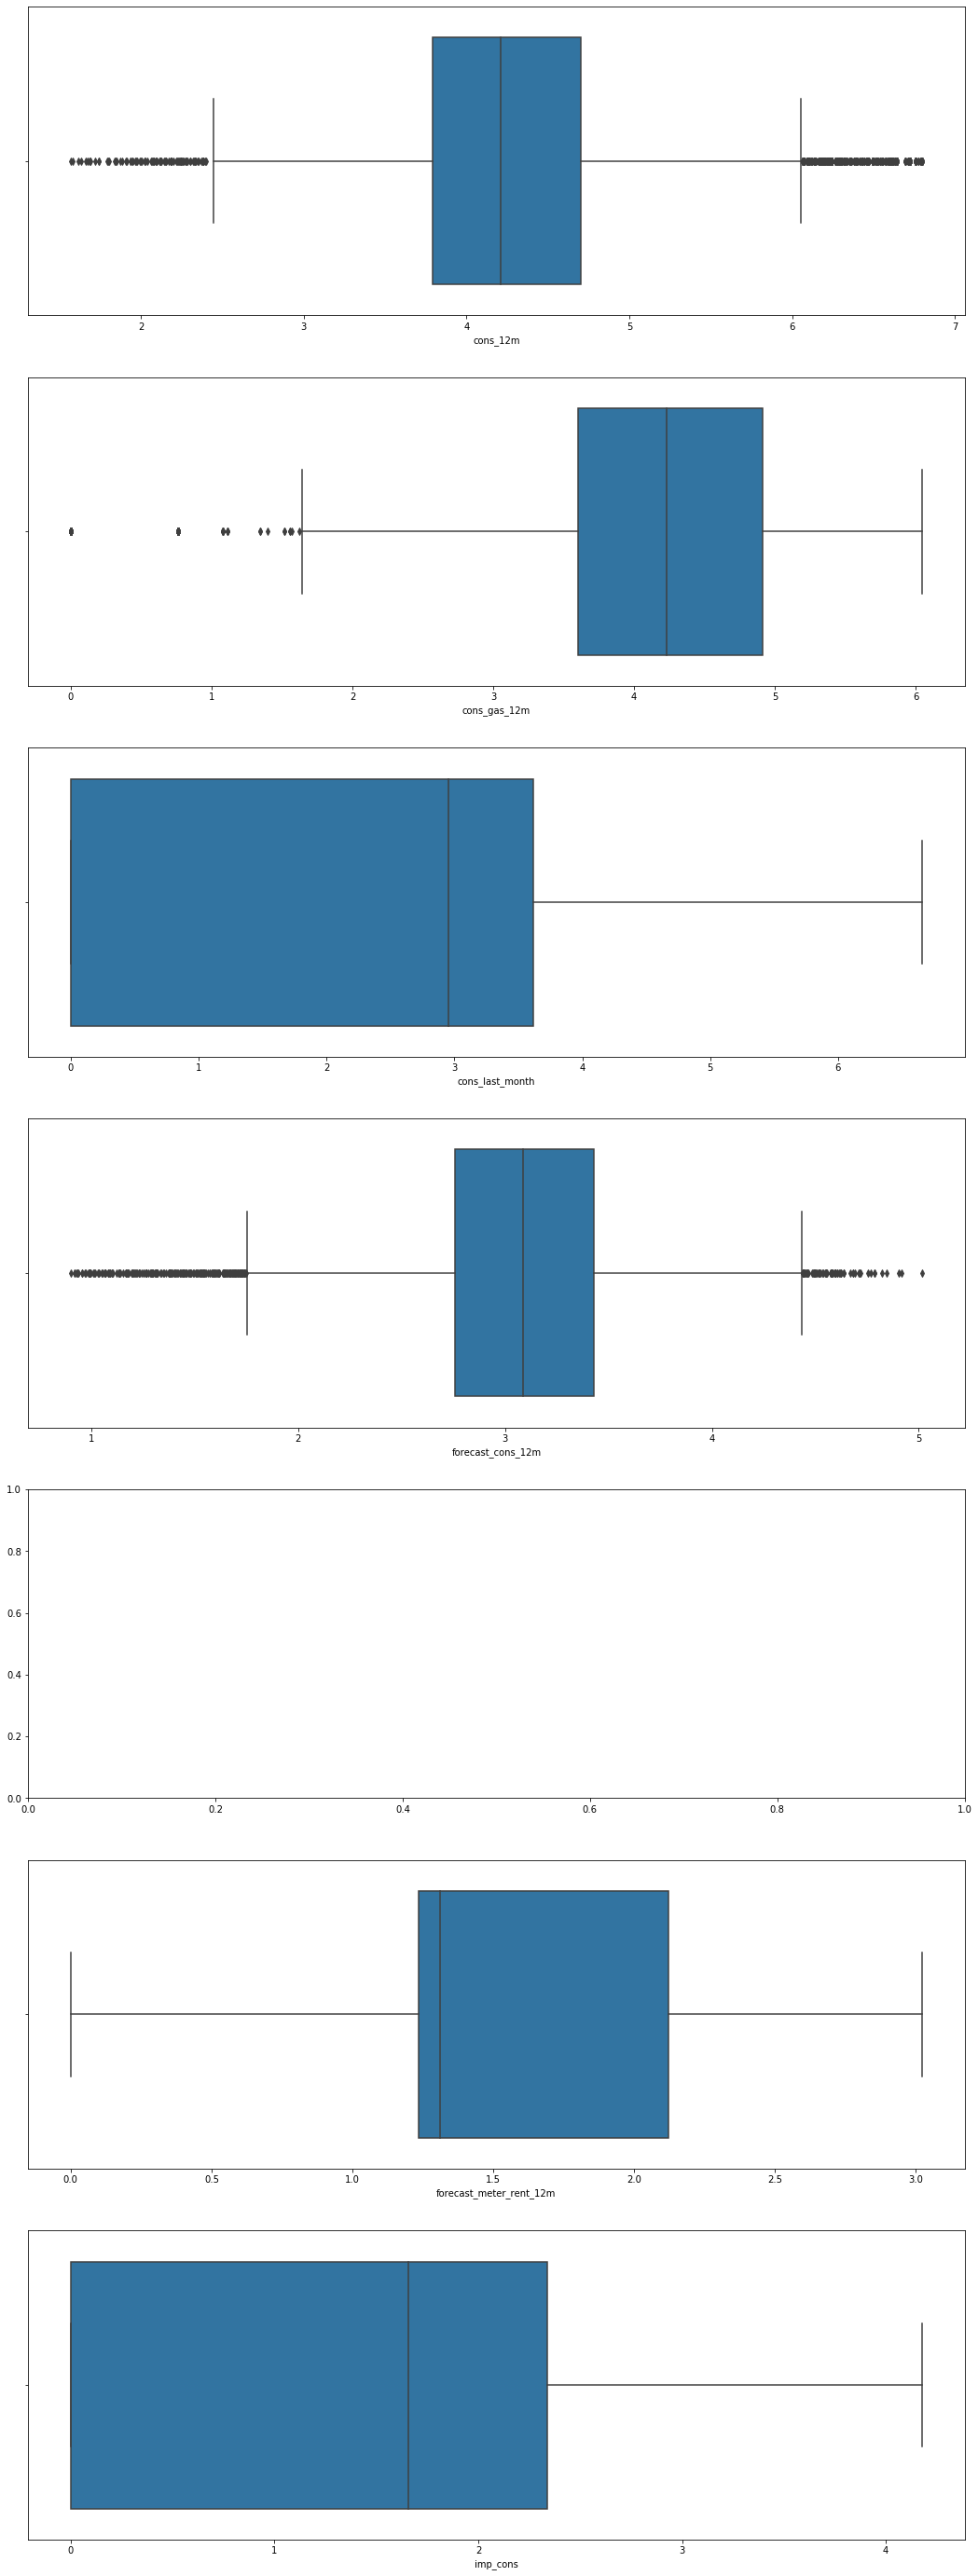

In [111]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

# 9. Modelling

In [112]:
y = train["churn"]
X = train.drop(labels = ["id","churn"],axis = 1)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

In [114]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [115]:
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn import metrics
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1)
result = model.fit(X_train,y_train)

In [116]:
def evaluate(model_, X_test_, y_test_):
    """
    Evaluate the accuracy, precision and recall of a model
    """

    # Get the model predictions
    prediction_test_ = model_.predict(X_test_)

    # Print the evaluation metrics as pandas dataframe
    results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test_, prediction_test_)],
    "Precision" : [metrics.precision_score(y_test_, prediction_test_)],
    "Recall" : [metrics.recall_score(y_test_, prediction_test_)]})

    # For a more detailed report
    #print(metrics.classification_report(y_test_, prediction_test_))
    return results

In [117]:
evaluate(model, X_test, y_test)

,Accuracy,Precision,Recall
0,0.904324,0.678571,0.137349


In [118]:
def calculate_roc_auc(model_, X_test_, y_test_):
    """
    Evaluate the roc-auc score
    """

    # Get the model predictions
    # Note that we are using the prediction for the class 1 -> churn
    prediction_test_ = model_.predict_proba(X_test_)[:,1]
    # Compute roc-auc
    fpr, tpr, thresholds = metrics.roc_curve(y_test_, prediction_test_)

    # Print the evaluation metrics as pandas dataframe
    score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
    return fpr, tpr, score
def plot_roc_auc(fpr,tpr):
    """
    Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates.
    """

    # Initialize plot
    f, ax = plt.subplots(figsize=(14,8))

    # Plot ROC
    roc_auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2, alpha=0.3,
    label="AUC = %0.2f" % (roc_auc))
    # Plot the random line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
    label="Random", alpha=.8)

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")
    ax.set_title("ROC-AUC")
    ax.legend(loc="lower right")
    plt.show()

In [119]:
fpr, tpr, auc_score = calculate_roc_auc(model, X_test, y_test)

In [120]:
auc_score

,ROC-AUC
0,0.681828


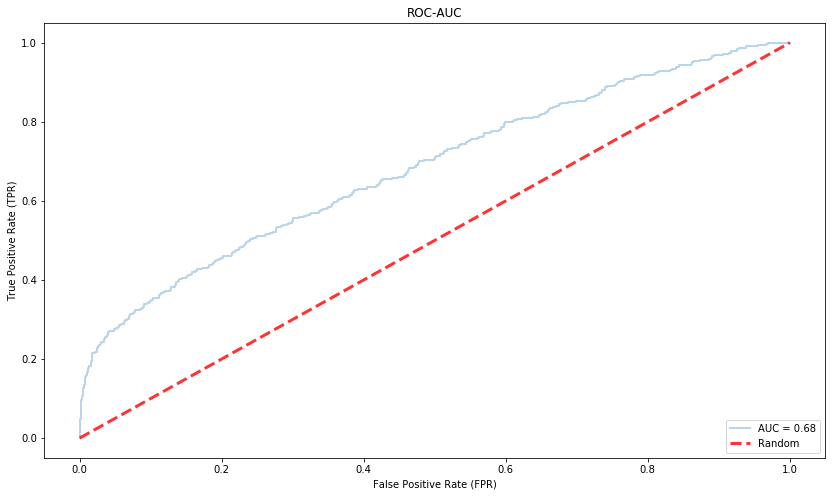

In [121]:
plot_roc_auc(fpr, tpr)
plt.show()

In [122]:
def plot_roc_curve(fprs, tprs):
    """
    Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates.
    """

# Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(18,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=2, alpha=0.3,
            label="ROC fold %d (AUC = %0.2f)" % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
    label="Random", alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=4, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=.2,
    label=r"$\pm$ 1 std. dev.")

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")
    ax.set_title("ROC-AUC")
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)
def compute_roc_auc(model_, index):
    y_predict = model_.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score

In [123]:
cv = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
fprs, tprs, scores = [], [], []

In [124]:
for (train, test), i in zip(cv.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(model, train)
    fpr, tpr, auc_score = compute_roc_auc(model, test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

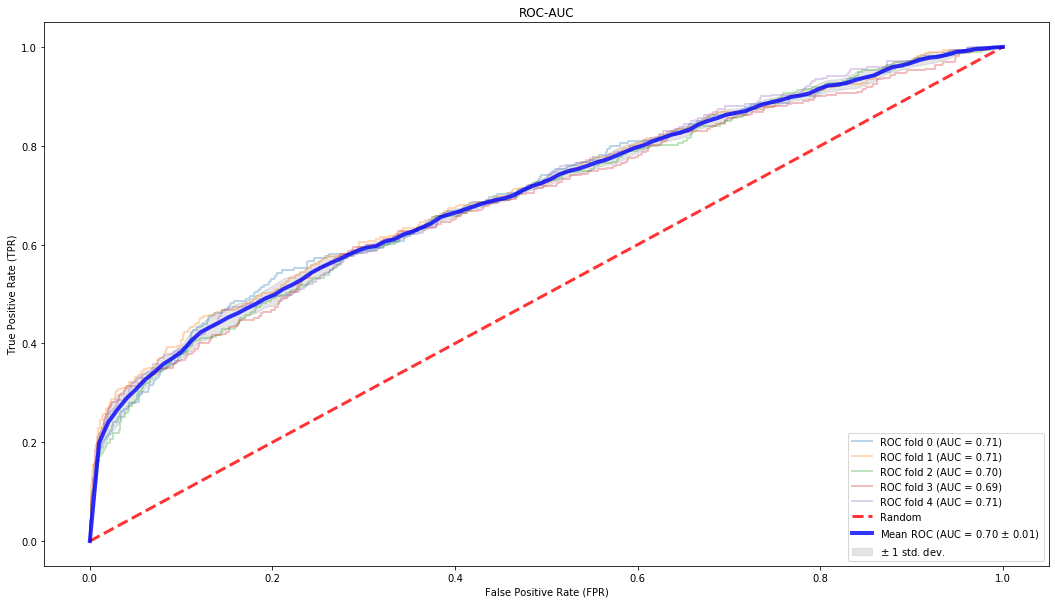

In [125]:
plot_roc_curve(fprs, tprs)
plt.show()

# 9A. Model finetuning

In [126]:
from sklearn.model_selection import RandomizedSearchCV
params = {
 'min_child_weight': [i for i in np.arange(1,15,1)],
 'gamma': [i for i in np.arange(0,6,0.5)],
 'subsample': [i for i in np.arange(0,1.1,0.1)],
 'colsample_bytree': [i for i in np.arange(0,1.1,0.1)],
 'max_depth': [i for i in np.arange(1,15,1)],
 'scale_pos_weight':[i for i in np.arange(1,15,1)],
 'learning_rate': [i for i in np.arange(0,0.15,0.01)],
 'n_estimators' : [i for i in np.arange(0,2000,100)]
 }

In [127]:
# Create model
xg = xgb.XGBClassifier(objective='binary:logistic',
 silent=True, nthread=1)

In [128]:
# Random search of parameters, using 5
xg_random = RandomizedSearchCV(xg, param_distributions=params,
             n_iter=1, scoring= "roc_auc",
             n_jobs=4, cv=5, verbose=3, random_state=1001)
# Fit the random search model
xg_random.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   22.8s remaining:   34.3s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   33.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale...
                                        'n_estimators': [0, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                    

In [129]:
best_random = xg_random.best_params_
best_random

{'subsample': 0.0,
 'scale_pos_weight': 6,
 'n_estimators': 300,
 'min_child_weight': 10,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 2.5,
 'colsample_bytree': 1.0}

In [130]:
best_random = {'subsample': 0.8,
'scale_pos_weight': 1,
'n_estimators': 1100,
'min_child_weight': 1,
'max_depth': 12,
'learning_rate': 0.01,
'gamma': 4.0,
'colsample_bytree': 0.60}

In [131]:
# Create a model with the parameters found
model_random = xgb.XGBClassifier(objective='binary:logistic',
 silent=True, nthread=1, **best_random)
fprs, tprs, scores = [], [], []

In [132]:
for (train, test), i in zip(cv.split(X, y), range(5)):
    model_random.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(model_random, train)
    fpr, tpr, auc_score = compute_roc_auc(model_random, test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

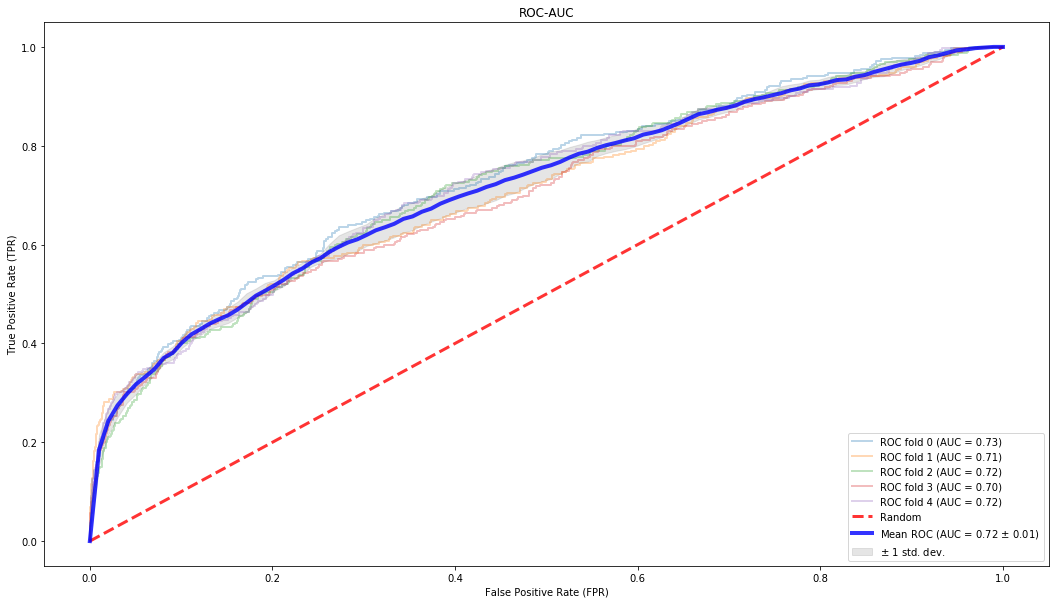

In [133]:
plot_roc_curve(fprs, tprs)
plt.show()

In [134]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {'subsample': [0.7],
 'scale_pos_weight': [1],
 'n_estimators': [1100],
 'min_child_weight': [1],
 'max_depth': [12, 13, 14],
 'learning_rate': [0.005, 0.01],
 'gamma': [4.0],
 'colsample_bytree': [0.6]}

In [135]:
# Create model
xg = xgb.XGBClassifier(objective='binary:logistic',
 silent=True, nthread=1)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xg, param_grid = param_grid,
 cv = 5, n_jobs = -1, verbose = 2, scoring = "roc_auc")

In [136]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 41.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=1, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_w...ed=None, silent=True,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6], 'gamma': [4.0],
                         'learning_rate': [0.005, 0.01],
                         'max_depth': [12, 13, 14], 'min_child_we

In [137]:
best_grid = grid_search.best_params_
best_grid

{'colsample_bytree': 0.6,
 'gamma': 4.0,
 'learning_rate': 0.005,
 'max_depth': 14,
 'min_child_weight': 1,
 'n_estimators': 1100,
 'scale_pos_weight': 1,
 'subsample': 0.7}

In [138]:
# Create a model with the parameters found
model_grid = xgb.XGBClassifier(objective='binary:logistic',
 silent=True, nthread=1, **best_grid)
fprs, tprs, scores = [], [], []

In [139]:
for (train, test), i in zip(cv.split(X, y), range(5)):
    model_grid.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(model_grid, train)
    fpr, tpr, auc_score = compute_roc_auc(model_grid, test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

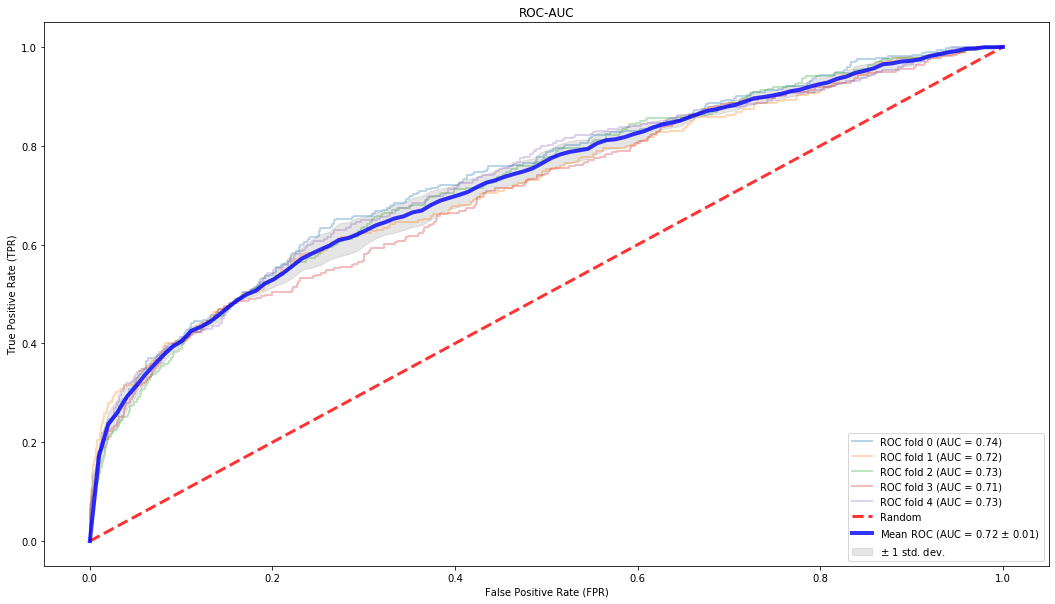

In [140]:
plot_roc_curve(fprs, tprs)
plt.show()

# 10. Feature importance
One simple way of boserving the feature importance is through counting the number of times each feature is split on across all boosting rounds (trees)
in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear

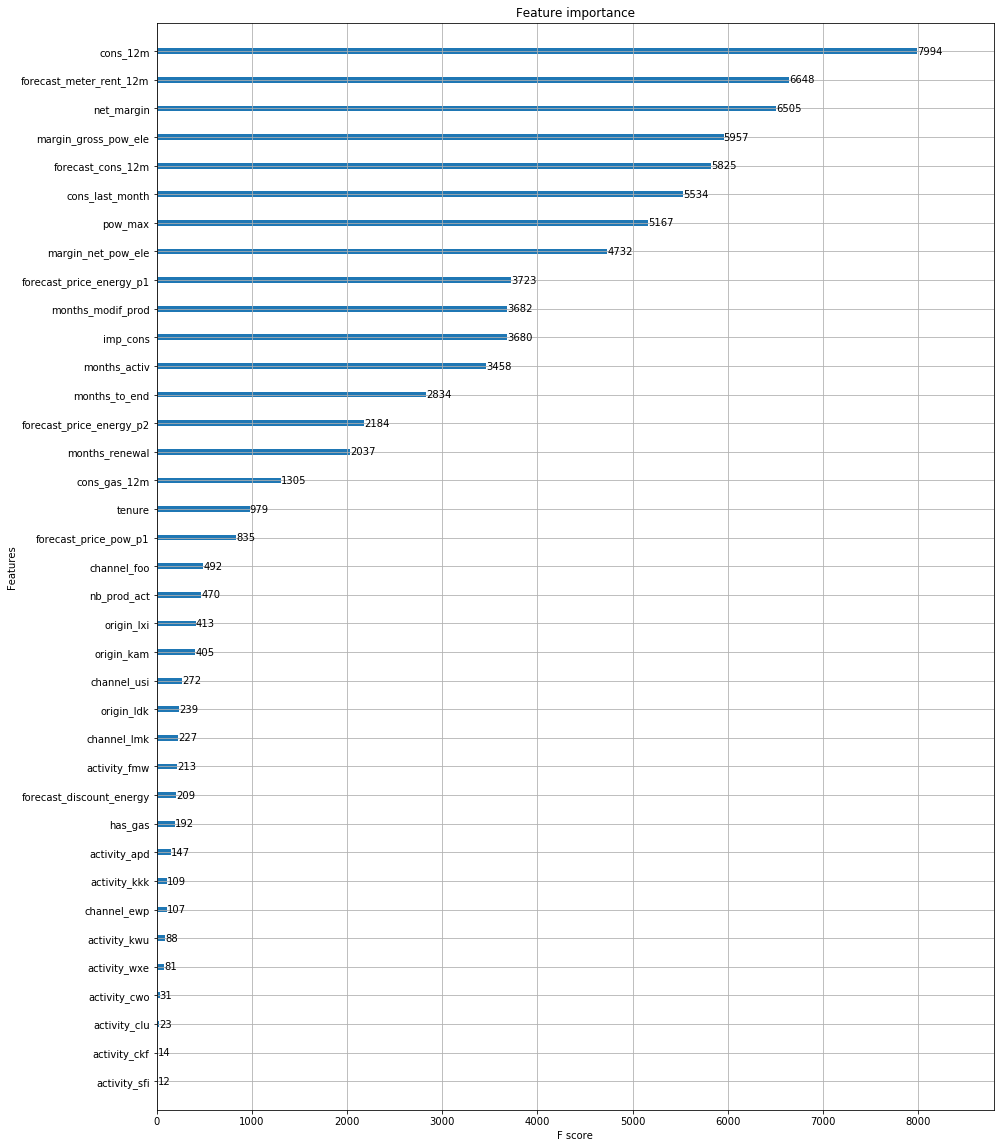

In [141]:
fig, ax = plt.subplots(figsize=(15,20))
xgb.plot_importance(model_grid, ax=ax)

**Predictive model able to predict churn but
main driver is not customer price sensitivity**
- Yearly consumption, 
- forecasted consumption and
- net margin
**are the 3 largest
drivers**